## Define the Convolutional Neural Network

After you've looked at the data you're working with and, in this case, know the shapes of the images and of the keypoints, you are ready to define a convolutional neural network that can *learn* from this data.

In this notebook and in `models.py`, you will:
1. Define a CNN with images as input and keypoints as output
2. Construct the transformed FaceKeypointsDataset, just as before
3. Train the CNN on the training data, tracking loss
4. See how the trained model performs on test data
5. If necessary, modify the CNN structure and model hyperparameters, so that it performs *well* **\***

**\*** What does *well* mean?

"Well" means that the model's loss decreases during training **and**, when applied to test image data, the model produces keypoints that closely match the true keypoints of each face. And you'll see examples of this later in the notebook.

---


## CNN Architecture

Recall that CNN's are defined by a few types of layers:
* Convolutional layers
* Maxpooling layers
* Fully-connected layers

You are required to use the above layers and encouraged to add multiple convolutional layers and things like dropout layers that may prevent overfitting. You are also encouraged to look at literature on keypoint detection, such as [this paper](https://arxiv.org/pdf/1710.00977.pdf), to help you determine the structure of your network.


### TODO: Define your model in the provided file `models.py` file

This file is mostly empty but contains the expected name and some TODO's for creating your model.

---

## PyTorch Neural Nets

To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the feedforward behavior of a network that employs those initialized layers in the function `forward`, which takes in an input image tensor, `x`. The structure of this Net class is shown below and left for you to fill in.

Note: During training, PyTorch will be able to perform backpropagation by keeping track of the network's feedforward behavior and using autograd to calculate the update to the weights in the network.

#### Define the Layers in ` __init__`
As a reminder, a conv/pool layer may be defined like this (in `__init__`):
```
# 1 input image channel (for grayscale images), 32 output channels/feature maps, 3x3 square convolution kernel
self.conv1 = nn.Conv2d(1, 32, 3)

# maxpool that uses a square window of kernel_size=2, stride=2
self.pool = nn.MaxPool2d(2, 2)      
```

#### Refer to Layers in `forward`
Then referred to in the `forward` function like this, in which the conv1 layer has a ReLu activation applied to it before maxpooling is applied:
```
x = self.pool(F.relu(self.conv1(x)))
```

Best practice is to place any layers whose weights will change during the training process in `__init__` and refer to them in the `forward` function; any layers or functions that always behave in the same way, such as a pre-defined activation function, should appear *only* in the `forward` function.

#### Why models.py

You are tasked with defining the network in the `models.py` file so that any models you define can be saved and loaded by name in different notebooks in this project directory. For example, by defining a CNN class called `Net` in `models.py`, you can then create that same architecture in this and other notebooks by simply importing the class and instantiating a model:
```
    from models import Net
    net = Net()
```

In [1]:
# load the data if you need to; if you have already loaded the data, you may comment this cell out
# -- DO NOT CHANGE THIS CELL -- #
!mkdir /data
!wget -P /data/ https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
!unzip -n /data/train-test-data.zip -d /data

--2020-06-17 14:11:16--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.104.37
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.104.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338613624 (323M) [application/zip]
Saving to: ‘/data/train-test-data.zip’

train-test-data.zip 100%[===================>] 322.93M  67.4MB/s    in 4.8s    

2020-06-17 14:11:21 (67.0 MB/s) - ‘/data/train-test-data.zip’ saved [338613624/338613624]

Archive:  /data/train-test-data.zip
   creating: /data/test/
  inflating: /data/test/Abdel_Aziz_Al-Hakim_00.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_01.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_10.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_11.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_40.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_41.jpg  
  inflating: /data/test/Abdullah_Gul_10

  inflating: /data/test/Andy_Rooney_11.jpg  
  inflating: /data/test/Andy_Rooney_20.jpg  
  inflating: /data/test/Andy_Rooney_21.jpg  
  inflating: /data/test/Andy_Rooney_50.jpg  
  inflating: /data/test/Andy_Rooney_51.jpg  
  inflating: /data/test/Angel_Lockward_30.jpg  
  inflating: /data/test/Angel_Lockward_31.jpg  
  inflating: /data/test/Angel_Lockward_40.jpg  
  inflating: /data/test/Angel_Lockward_41.jpg  
  inflating: /data/test/Angel_Lockward_50.jpg  
  inflating: /data/test/Angel_Lockward_51.jpg  
  inflating: /data/test/Angela_Bassett_20.jpg  
  inflating: /data/test/Angela_Bassett_21.jpg  
  inflating: /data/test/Angela_Bassett_30.jpg  
  inflating: /data/test/Angela_Bassett_31.jpg  
  inflating: /data/test/Angela_Bassett_40.jpg  
  inflating: /data/test/Angela_Bassett_41.jpg  
  inflating: /data/test/Angelo_Reyes_20.jpg  
  inflating: /data/test/Angelo_Reyes_21.jpg  
  inflating: /data/test/Angelo_Reyes_30.jpg  
  inflating: /data/test/Angelo_Reyes_31.jpg  
  inflating: /d

  inflating: /data/test/Celso_Amorim_40.jpg  
  inflating: /data/test/Celso_Amorim_41.jpg  
  inflating: /data/test/Celso_Amorim_50.jpg  
  inflating: /data/test/Celso_Amorim_51.jpg  
  inflating: /data/test/Celso_Lafer_00.jpg  
  inflating: /data/test/Celso_Lafer_01.jpg  
  inflating: /data/test/Celso_Lafer_10.jpg  
  inflating: /data/test/Celso_Lafer_11.jpg  
  inflating: /data/test/Celso_Lafer_20.jpg  
  inflating: /data/test/Celso_Lafer_21.jpg  
  inflating: /data/test/Chadha_Gurinder_10.jpg  
  inflating: /data/test/Chadha_Gurinder_11.jpg  
  inflating: /data/test/Chadha_Gurinder_20.jpg  
  inflating: /data/test/Chadha_Gurinder_21.jpg  
  inflating: /data/test/Chadha_Gurinder_50.jpg  
  inflating: /data/test/Chadha_Gurinder_51.jpg  
  inflating: /data/test/Charles_Bronson_00.jpg  
  inflating: /data/test/Charles_Bronson_01.jpg  
  inflating: /data/test/Charles_Bronson_10.jpg  
  inflating: /data/test/Charles_Bronson_11.jpg  
  inflating: /data/test/Charles_Bronson_50.jpg  
  infla

  inflating: /data/test/Connie_Chung_40.jpg  
  inflating: /data/test/Connie_Chung_41.jpg  
  inflating: /data/test/Connie_Chung_50.jpg  
  inflating: /data/test/Connie_Chung_51.jpg  
  inflating: /data/test/Craig_David_10.jpg  
  inflating: /data/test/Craig_David_11.jpg  
  inflating: /data/test/Craig_David_20.jpg  
  inflating: /data/test/Craig_David_21.jpg  
  inflating: /data/test/Craig_David_30.jpg  
  inflating: /data/test/Craig_David_31.jpg  
  inflating: /data/test/Craig_David_50.jpg  
  inflating: /data/test/Craig_David_51.jpg  
  inflating: /data/test/Cristina_Fernandez_30.jpg  
  inflating: /data/test/Cristina_Fernandez_31.jpg  
  inflating: /data/test/Cristina_Fernandez_40.jpg  
  inflating: /data/test/Cristina_Fernandez_41.jpg  
  inflating: /data/test/Cristina_Fernandez_50.jpg  
  inflating: /data/test/Cristina_Fernandez_51.jpg  
  inflating: /data/test/Cristina_Saralegui_00.jpg  
  inflating: /data/test/Cristina_Saralegui_01.jpg  
  inflating: /data/test/Cristina_Saraleg

  inflating: /data/test/Elton_John_11.jpg  
  inflating: /data/test/Elton_John_20.jpg  
  inflating: /data/test/Elton_John_21.jpg  
  inflating: /data/test/Elton_John_30.jpg  
  inflating: /data/test/Elton_John_31.jpg  
  inflating: /data/test/Elton_John_40.jpg  
  inflating: /data/test/Elton_John_41.jpg  
  inflating: /data/test/Emile_Lahoud_00.jpg  
  inflating: /data/test/Emile_Lahoud_01.jpg  
  inflating: /data/test/Emile_Lahoud_30.jpg  
  inflating: /data/test/Emile_Lahoud_31.jpg  
  inflating: /data/test/Emile_Lahoud_40.jpg  
  inflating: /data/test/Emile_Lahoud_41.jpg  
  inflating: /data/test/Emilio_Botin_00.jpg  
  inflating: /data/test/Emilio_Botin_01.jpg  
  inflating: /data/test/Emilio_Botin_10.jpg  
  inflating: /data/test/Emilio_Botin_11.jpg  
  inflating: /data/test/Emilio_Botin_20.jpg  
  inflating: /data/test/Emilio_Botin_21.jpg  
  inflating: /data/test/Emilio_Botin_40.jpg  
  inflating: /data/test/Emilio_Botin_41.jpg  
  inflating: /data/test/Emma_Nicholson_10.jpg  


  inflating: /data/test/Gene_Hackman_41.jpg  
  inflating: /data/test/Geoffrey_Rush_00.jpg  
  inflating: /data/test/Geoffrey_Rush_01.jpg  
  inflating: /data/test/Geoffrey_Rush_10.jpg  
  inflating: /data/test/Geoffrey_Rush_11.jpg  
  inflating: /data/test/Geoffrey_Rush_20.jpg  
  inflating: /data/test/Geoffrey_Rush_21.jpg  
  inflating: /data/test/George_Galloway_00.jpg  
  inflating: /data/test/George_Galloway_01.jpg  
  inflating: /data/test/George_Galloway_20.jpg  
  inflating: /data/test/George_Galloway_21.jpg  
  inflating: /data/test/George_Galloway_40.jpg  
  inflating: /data/test/George_Galloway_41.jpg  
  inflating: /data/test/George_Galloway_50.jpg  
  inflating: /data/test/George_Galloway_51.jpg  
  inflating: /data/test/George_Karl_10.jpg  
  inflating: /data/test/George_Karl_11.jpg  
  inflating: /data/test/George_Karl_20.jpg  
  inflating: /data/test/George_Karl_21.jpg  
  inflating: /data/test/George_Karl_50.jpg  
  inflating: /data/test/George_Karl_51.jpg  
  inflatin

  inflating: /data/test/Kate_Winslet_11.jpg  
  inflating: /data/test/Kate_Winslet_50.jpg  
  inflating: /data/test/Kate_Winslet_51.jpg  
  inflating: /data/test/Katharine_Hepburn_10.jpg  
  inflating: /data/test/Katharine_Hepburn_11.jpg  
  inflating: /data/test/Katharine_Hepburn_30.jpg  
  inflating: /data/test/Katharine_Hepburn_31.jpg  
  inflating: /data/test/Katharine_Hepburn_40.jpg  
  inflating: /data/test/Katharine_Hepburn_41.jpg  
  inflating: /data/test/Kathryn_Morris_10.jpg  
  inflating: /data/test/Kathryn_Morris_11.jpg  
  inflating: /data/test/Kathryn_Morris_20.jpg  
  inflating: /data/test/Kathryn_Morris_21.jpg  
  inflating: /data/test/Kathryn_Morris_40.jpg  
  inflating: /data/test/Kathryn_Morris_41.jpg  
  inflating: /data/test/Kathryn_Morris_50.jpg  
  inflating: /data/test/Kathryn_Morris_51.jpg  
  inflating: /data/test/Katja_Riemann_00.jpg  
  inflating: /data/test/Katja_Riemann_01.jpg  
  inflating: /data/test/Katja_Riemann_10.jpg  
  inflating: /data/test/Katja_R

  inflating: /data/test/Linda_Dano_01.jpg  
  inflating: /data/test/Linda_Dano_20.jpg  
  inflating: /data/test/Linda_Dano_21.jpg  
  inflating: /data/test/Linda_Dano_30.jpg  
  inflating: /data/test/Linda_Dano_31.jpg  
  inflating: /data/test/Linda_Dano_50.jpg  
  inflating: /data/test/Linda_Dano_51.jpg  
  inflating: /data/test/Linda_Franklin_00.jpg  
  inflating: /data/test/Linda_Franklin_01.jpg  
  inflating: /data/test/Linda_Franklin_10.jpg  
  inflating: /data/test/Linda_Franklin_11.jpg  
  inflating: /data/test/Linda_Franklin_20.jpg  
  inflating: /data/test/Linda_Franklin_21.jpg  
  inflating: /data/test/Linda_Franklin_40.jpg  
  inflating: /data/test/Linda_Franklin_41.jpg  
  inflating: /data/test/Linda_Sanchez_00.jpg  
  inflating: /data/test/Linda_Sanchez_01.jpg  
  inflating: /data/test/Linda_Sanchez_10.jpg  
  inflating: /data/test/Linda_Sanchez_11.jpg  
  inflating: /data/test/Linda_Sanchez_20.jpg  
  inflating: /data/test/Linda_Sanchez_21.jpg  
  inflating: /data/test/Li

  inflating: /data/test/Mario_Kreutzberger_20.jpg  
  inflating: /data/test/Mario_Kreutzberger_21.jpg  
  inflating: /data/test/Mario_Kreutzberger_30.jpg  
  inflating: /data/test/Mario_Kreutzberger_31.jpg  
  inflating: /data/test/Mario_Kreutzberger_40.jpg  
  inflating: /data/test/Mario_Kreutzberger_41.jpg  
  inflating: /data/test/Marisa_Tomei_10.jpg  
  inflating: /data/test/Marisa_Tomei_11.jpg  
  inflating: /data/test/Marisa_Tomei_20.jpg  
  inflating: /data/test/Marisa_Tomei_21.jpg  
  inflating: /data/test/Marisa_Tomei_40.jpg  
  inflating: /data/test/Marisa_Tomei_41.jpg  
  inflating: /data/test/Marissa_Jaret_Winokur_00.jpg  
  inflating: /data/test/Marissa_Jaret_Winokur_01.jpg  
  inflating: /data/test/Marissa_Jaret_Winokur_30.jpg  
  inflating: /data/test/Marissa_Jaret_Winokur_31.jpg  
  inflating: /data/test/Marissa_Jaret_Winokur_40.jpg  
  inflating: /data/test/Marissa_Jaret_Winokur_41.jpg  
  inflating: /data/test/Mark_Foley_10.jpg  
  inflating: /data/test/Mark_Foley_11.

  inflating: /data/test/Peter_Goldmark_51.jpg  
  inflating: /data/test/Peter_Medgyessy_10.jpg  
  inflating: /data/test/Peter_Medgyessy_11.jpg  
  inflating: /data/test/Peter_Medgyessy_30.jpg  
  inflating: /data/test/Peter_Medgyessy_31.jpg  
  inflating: /data/test/Peter_Medgyessy_40.jpg  
  inflating: /data/test/Peter_Medgyessy_41.jpg  
  inflating: /data/test/Peter_Medgyessy_50.jpg  
  inflating: /data/test/Peter_Medgyessy_51.jpg  
  inflating: /data/test/Philippe_Gagnon_00.jpg  
  inflating: /data/test/Philippe_Gagnon_01.jpg  
  inflating: /data/test/Philippe_Gagnon_10.jpg  
  inflating: /data/test/Philippe_Gagnon_11.jpg  
  inflating: /data/test/Philippe_Gagnon_20.jpg  
  inflating: /data/test/Philippe_Gagnon_21.jpg  
  inflating: /data/test/Philippe_Gagnon_30.jpg  
  inflating: /data/test/Philippe_Gagnon_31.jpg  
  inflating: /data/test/Philippe_Noiret_10.jpg  
  inflating: /data/test/Philippe_Noiret_11.jpg  
  inflating: /data/test/Philippe_Noiret_30.jpg  
  inflating: /data/te

  inflating: /data/test/Sally_Ride_50.jpg  
  inflating: /data/test/Sally_Ride_51.jpg  
  inflating: /data/test/Sanjay_Gupta_10.jpg  
  inflating: /data/test/Sanjay_Gupta_11.jpg  
  inflating: /data/test/Sanjay_Gupta_20.jpg  
  inflating: /data/test/Sanjay_Gupta_21.jpg  
  inflating: /data/test/Sanjay_Gupta_40.jpg  
  inflating: /data/test/Sanjay_Gupta_41.jpg  
  inflating: /data/test/Sara_Silverman_10.jpg  
  inflating: /data/test/Sara_Silverman_11.jpg  
  inflating: /data/test/Sara_Silverman_20.jpg  
  inflating: /data/test/Sara_Silverman_21.jpg  
  inflating: /data/test/Sara_Silverman_40.jpg  
  inflating: /data/test/Sara_Silverman_41.jpg  
  inflating: /data/test/Sara_Silverman_50.jpg  
  inflating: /data/test/Sara_Silverman_51.jpg  
  inflating: /data/test/Sarah_Wynter_00.jpg  
  inflating: /data/test/Sarah_Wynter_01.jpg  
  inflating: /data/test/Sarah_Wynter_40.jpg  
  inflating: /data/test/Sarah_Wynter_41.jpg  
  inflating: /data/test/Sarah_Wynter_50.jpg  
  inflating: /data/tes

  inflating: /data/test/Wayne_Allard_21.jpg  
  inflating: /data/test/Wayne_Allard_50.jpg  
  inflating: /data/test/Wayne_Allard_51.jpg  
  inflating: /data/test/Wayne_Gretzky_20.jpg  
  inflating: /data/test/Wayne_Gretzky_21.jpg  
  inflating: /data/test/Wayne_Gretzky_30.jpg  
  inflating: /data/test/Wayne_Gretzky_31.jpg  
  inflating: /data/test/Wayne_Gretzky_40.jpg  
  inflating: /data/test/Wayne_Gretzky_41.jpg  
  inflating: /data/test/Wayne_Newton_10.jpg  
  inflating: /data/test/Wayne_Newton_11.jpg  
  inflating: /data/test/Wayne_Newton_20.jpg  
  inflating: /data/test/Wayne_Newton_21.jpg  
  inflating: /data/test/Wayne_Newton_40.jpg  
  inflating: /data/test/Wayne_Newton_41.jpg  
  inflating: /data/test/Wes_Craven_00.jpg  
  inflating: /data/test/Wes_Craven_01.jpg  
  inflating: /data/test/Wes_Craven_20.jpg  
  inflating: /data/test/Wes_Craven_21.jpg  
  inflating: /data/test/Wes_Craven_30.jpg  
  inflating: /data/test/Wes_Craven_31.jpg  
  inflating: /data/test/Wes_Craven_50.jp

  inflating: /data/training/Aishwarya_Rai_41.jpg  
  inflating: /data/training/Aishwarya_Rai_42.jpg  
  inflating: /data/training/Aishwarya_Rai_50.jpg  
  inflating: /data/training/Aishwarya_Rai_51.jpg  
  inflating: /data/training/Aishwarya_Rai_52.jpg  
  inflating: /data/training/Albert_Brooks_00.jpg  
  inflating: /data/training/Albert_Brooks_01.jpg  
  inflating: /data/training/Albert_Brooks_02.jpg  
  inflating: /data/training/Albert_Brooks_10.jpg  
  inflating: /data/training/Albert_Brooks_11.jpg  
  inflating: /data/training/Albert_Brooks_12.jpg  
  inflating: /data/training/Albert_Brooks_30.jpg  
  inflating: /data/training/Albert_Brooks_31.jpg  
  inflating: /data/training/Albert_Brooks_32.jpg  
  inflating: /data/training/Alejandro_Toledo_10.jpg  
  inflating: /data/training/Alejandro_Toledo_11.jpg  
  inflating: /data/training/Alejandro_Toledo_12.jpg  
  inflating: /data/training/Alejandro_Toledo_30.jpg  
  inflating: /data/training/Alejandro_Toledo_31.jpg  
  inflating: /da

  inflating: /data/training/Barbara_Bodine_01.jpg  
  inflating: /data/training/Barbara_Bodine_02.jpg  
  inflating: /data/training/Barbara_Bodine_20.jpg  
  inflating: /data/training/Barbara_Bodine_21.jpg  
  inflating: /data/training/Barbara_Bodine_22.jpg  
  inflating: /data/training/Barbara_Bodine_40.jpg  
  inflating: /data/training/Barbara_Bodine_41.jpg  
  inflating: /data/training/Barbara_Bodine_42.jpg  
  inflating: /data/training/Barbara_Bodine_50.jpg  
  inflating: /data/training/Barbara_Bodine_51.jpg  
  inflating: /data/training/Barbara_Bodine_52.jpg  
  inflating: /data/training/Barbara_Boxer_10.jpg  
  inflating: /data/training/Barbara_Boxer_11.jpg  
  inflating: /data/training/Barbara_Boxer_12.jpg  
  inflating: /data/training/Barbara_Boxer_40.jpg  
  inflating: /data/training/Barbara_Boxer_41.jpg  
  inflating: /data/training/Barbara_Boxer_42.jpg  
  inflating: /data/training/Barbara_Boxer_50.jpg  
  inflating: /data/training/Barbara_Boxer_51.jpg  
  inflating: /data/t

  inflating: /data/training/Carlos_Menem_20.jpg  
  inflating: /data/training/Carlos_Menem_21.jpg  
  inflating: /data/training/Carlos_Menem_22.jpg  
  inflating: /data/training/Carlos_Menem_30.jpg  
  inflating: /data/training/Carlos_Menem_31.jpg  
  inflating: /data/training/Carlos_Menem_32.jpg  
  inflating: /data/training/Carlos_Queiroz_00.jpg  
  inflating: /data/training/Carlos_Queiroz_01.jpg  
  inflating: /data/training/Carlos_Queiroz_02.jpg  
  inflating: /data/training/Carlos_Queiroz_10.jpg  
  inflating: /data/training/Carlos_Queiroz_11.jpg  
  inflating: /data/training/Carlos_Queiroz_12.jpg  
  inflating: /data/training/Carlos_Queiroz_50.jpg  
  inflating: /data/training/Carlos_Queiroz_51.jpg  
  inflating: /data/training/Carlos_Queiroz_52.jpg  
  inflating: /data/training/Carrie-Anne_Moss_00.jpg  
  inflating: /data/training/Carrie-Anne_Moss_01.jpg  
  inflating: /data/training/Carrie-Anne_Moss_02.jpg  
  inflating: /data/training/Carrie-Anne_Moss_10.jpg  
  inflating: /da

  inflating: /data/training/Christopher_Reeve_11.jpg  
  inflating: /data/training/Christopher_Reeve_12.jpg  
  inflating: /data/training/Christopher_Reeve_20.jpg  
  inflating: /data/training/Christopher_Reeve_21.jpg  
  inflating: /data/training/Christopher_Reeve_22.jpg  
  inflating: /data/training/Christopher_Reeve_40.jpg  
  inflating: /data/training/Christopher_Reeve_41.jpg  
  inflating: /data/training/Christopher_Reeve_42.jpg  
  inflating: /data/training/Christopher_Walken_00.jpg  
  inflating: /data/training/Christopher_Walken_01.jpg  
  inflating: /data/training/Christopher_Walken_02.jpg  
  inflating: /data/training/Christopher_Walken_20.jpg  
  inflating: /data/training/Christopher_Walken_21.jpg  
  inflating: /data/training/Christopher_Walken_22.jpg  
  inflating: /data/training/Christopher_Walken_40.jpg  
  inflating: /data/training/Christopher_Walken_41.jpg  
  inflating: /data/training/Christopher_Walken_42.jpg  
  inflating: /data/training/Christopher_Walken_50.jpg  


  inflating: /data/training/Dai_Bachtiar_20.jpg  
  inflating: /data/training/Dai_Bachtiar_21.jpg  
  inflating: /data/training/Dai_Bachtiar_22.jpg  
  inflating: /data/training/Dai_Bachtiar_50.jpg  
  inflating: /data/training/Dai_Bachtiar_51.jpg  
  inflating: /data/training/Dai_Bachtiar_52.jpg  
  inflating: /data/training/Daisy_Fuentes_20.jpg  
  inflating: /data/training/Daisy_Fuentes_21.jpg  
  inflating: /data/training/Daisy_Fuentes_22.jpg  
  inflating: /data/training/Daisy_Fuentes_30.jpg  
  inflating: /data/training/Daisy_Fuentes_31.jpg  
  inflating: /data/training/Daisy_Fuentes_32.jpg  
  inflating: /data/training/Daisy_Fuentes_40.jpg  
  inflating: /data/training/Daisy_Fuentes_41.jpg  
  inflating: /data/training/Daisy_Fuentes_42.jpg  
  inflating: /data/training/Dan_Ackroyd_00.jpg  
  inflating: /data/training/Dan_Ackroyd_01.jpg  
  inflating: /data/training/Dan_Ackroyd_02.jpg  
  inflating: /data/training/Dan_Ackroyd_20.jpg  
  inflating: /data/training/Dan_Ackroyd_21.jp

  inflating: /data/training/Eliane_Karp_30.jpg  
  inflating: /data/training/Eliane_Karp_31.jpg  
  inflating: /data/training/Eliane_Karp_32.jpg  
  inflating: /data/training/Eliane_Karp_40.jpg  
  inflating: /data/training/Eliane_Karp_41.jpg  
  inflating: /data/training/Eliane_Karp_42.jpg  
  inflating: /data/training/Elijah_Wood_00.jpg  
  inflating: /data/training/Elijah_Wood_01.jpg  
  inflating: /data/training/Elijah_Wood_02.jpg  
  inflating: /data/training/Elijah_Wood_10.jpg  
  inflating: /data/training/Elijah_Wood_11.jpg  
  inflating: /data/training/Elijah_Wood_12.jpg  
  inflating: /data/training/Elijah_Wood_30.jpg  
  inflating: /data/training/Elijah_Wood_31.jpg  
  inflating: /data/training/Elijah_Wood_32.jpg  
  inflating: /data/training/Eliza_Dushku_00.jpg  
  inflating: /data/training/Eliza_Dushku_01.jpg  
  inflating: /data/training/Eliza_Dushku_02.jpg  
  inflating: /data/training/Eliza_Dushku_10.jpg  
  inflating: /data/training/Eliza_Dushku_11.jpg  
  inflating: /d

  inflating: /data/training/Estelle_Morris_21.jpg  
  inflating: /data/training/Estelle_Morris_22.jpg  
  inflating: /data/training/Estelle_Morris_30.jpg  
  inflating: /data/training/Estelle_Morris_31.jpg  
  inflating: /data/training/Estelle_Morris_32.jpg  
  inflating: /data/training/Ethan_Hawke_00.jpg  
  inflating: /data/training/Ethan_Hawke_01.jpg  
  inflating: /data/training/Ethan_Hawke_02.jpg  
  inflating: /data/training/Ethan_Hawke_10.jpg  
  inflating: /data/training/Ethan_Hawke_11.jpg  
  inflating: /data/training/Ethan_Hawke_12.jpg  
  inflating: /data/training/Ethan_Hawke_30.jpg  
  inflating: /data/training/Ethan_Hawke_31.jpg  
  inflating: /data/training/Ethan_Hawke_32.jpg  
  inflating: /data/training/Ethan_Hawke_40.jpg  
  inflating: /data/training/Ethan_Hawke_41.jpg  
  inflating: /data/training/Ethan_Hawke_42.jpg  
  inflating: /data/training/Eunice_Barber_00.jpg  
  inflating: /data/training/Eunice_Barber_01.jpg  
  inflating: /data/training/Eunice_Barber_02.jpg  

  inflating: /data/training/Gary_Condit_30.jpg  
  inflating: /data/training/Gary_Condit_31.jpg  
  inflating: /data/training/Gary_Condit_32.jpg  
  inflating: /data/training/Gene_Hackman_20.jpg  
  inflating: /data/training/Gene_Hackman_21.jpg  
  inflating: /data/training/Gene_Hackman_22.jpg  
  inflating: /data/training/Gene_Hackman_30.jpg  
  inflating: /data/training/Gene_Hackman_31.jpg  
  inflating: /data/training/Gene_Hackman_32.jpg  
  inflating: /data/training/Gene_Hackman_40.jpg  
  inflating: /data/training/Gene_Hackman_41.jpg  
  inflating: /data/training/Gene_Hackman_42.jpg  
  inflating: /data/training/Geoffrey_Rush_00.jpg  
  inflating: /data/training/Geoffrey_Rush_01.jpg  
  inflating: /data/training/Geoffrey_Rush_02.jpg  
  inflating: /data/training/Geoffrey_Rush_10.jpg  
  inflating: /data/training/Geoffrey_Rush_11.jpg  
  inflating: /data/training/Geoffrey_Rush_12.jpg  
  inflating: /data/training/Geoffrey_Rush_20.jpg  
  inflating: /data/training/Geoffrey_Rush_21.j

  inflating: /data/training/James_Cunningham_00.jpg  
  inflating: /data/training/James_Cunningham_01.jpg  
  inflating: /data/training/James_Cunningham_02.jpg  
  inflating: /data/training/James_Cunningham_20.jpg  
  inflating: /data/training/James_Cunningham_21.jpg  
  inflating: /data/training/James_Cunningham_22.jpg  
  inflating: /data/training/James_Cunningham_30.jpg  
  inflating: /data/training/James_Cunningham_31.jpg  
  inflating: /data/training/James_Cunningham_32.jpg  
  inflating: /data/training/James_Cunningham_40.jpg  
  inflating: /data/training/James_Cunningham_41.jpg  
  inflating: /data/training/James_Cunningham_42.jpg  
  inflating: /data/training/James_Hoffa_10.jpg  
  inflating: /data/training/James_Hoffa_11.jpg  
  inflating: /data/training/James_Hoffa_12.jpg  
  inflating: /data/training/James_Hoffa_20.jpg  
  inflating: /data/training/James_Hoffa_21.jpg  
  inflating: /data/training/James_Hoffa_22.jpg  
  inflating: /data/training/James_Hoffa_40.jpg  
  inflati

  inflating: /data/training/Kieran_Culkin_02.jpg  
  inflating: /data/training/Kieran_Culkin_10.jpg  
  inflating: /data/training/Kieran_Culkin_11.jpg  
  inflating: /data/training/Kieran_Culkin_12.jpg  
  inflating: /data/training/Kieran_Culkin_20.jpg  
  inflating: /data/training/Kieran_Culkin_21.jpg  
  inflating: /data/training/Kieran_Culkin_22.jpg  
  inflating: /data/training/Kirk_Ferentz_00.jpg  
  inflating: /data/training/Kirk_Ferentz_01.jpg  
  inflating: /data/training/Kirk_Ferentz_02.jpg  
  inflating: /data/training/Kirk_Ferentz_20.jpg  
  inflating: /data/training/Kirk_Ferentz_21.jpg  
  inflating: /data/training/Kirk_Ferentz_22.jpg  
  inflating: /data/training/Kirk_Ferentz_40.jpg  
  inflating: /data/training/Kirk_Ferentz_41.jpg  
  inflating: /data/training/Kirk_Ferentz_42.jpg  
  inflating: /data/training/Kirk_Ferentz_50.jpg  
  inflating: /data/training/Kirk_Ferentz_51.jpg  
  inflating: /data/training/Kirk_Ferentz_52.jpg  
  inflating: /data/training/Kirsten_Dunst_0

  inflating: /data/training/Leszek_Miller_02.jpg  
  inflating: /data/training/Leszek_Miller_10.jpg  
  inflating: /data/training/Leszek_Miller_11.jpg  
  inflating: /data/training/Leszek_Miller_12.jpg  
  inflating: /data/training/Leszek_Miller_30.jpg  
  inflating: /data/training/Leszek_Miller_31.jpg  
  inflating: /data/training/Leszek_Miller_32.jpg  
  inflating: /data/training/Leticia_Van_de_Putte_00.jpg  
  inflating: /data/training/Leticia_Van_de_Putte_01.jpg  
  inflating: /data/training/Leticia_Van_de_Putte_02.jpg  
  inflating: /data/training/Leticia_Van_de_Putte_10.jpg  
  inflating: /data/training/Leticia_Van_de_Putte_11.jpg  
  inflating: /data/training/Leticia_Van_de_Putte_12.jpg  
  inflating: /data/training/Leticia_Van_de_Putte_40.jpg  
  inflating: /data/training/Leticia_Van_de_Putte_41.jpg  
  inflating: /data/training/Leticia_Van_de_Putte_42.jpg  
  inflating: /data/training/Leuris_Pupo_00.jpg  
  inflating: /data/training/Leuris_Pupo_01.jpg  
  inflating: /data/trai

  inflating: /data/training/Lyle_Lovett_20.jpg  
  inflating: /data/training/Lyle_Lovett_21.jpg  
  inflating: /data/training/Lyle_Lovett_22.jpg  
  inflating: /data/training/Lyle_Lovett_40.jpg  
  inflating: /data/training/Lyle_Lovett_41.jpg  
  inflating: /data/training/Lyle_Lovett_42.jpg  
  inflating: /data/training/Lyle_Lovett_50.jpg  
  inflating: /data/training/Lyle_Lovett_51.jpg  
  inflating: /data/training/Lyle_Lovett_52.jpg  
  inflating: /data/training/Mack_Brown_00.jpg  
  inflating: /data/training/Mack_Brown_01.jpg  
  inflating: /data/training/Mack_Brown_02.jpg  
  inflating: /data/training/Mack_Brown_40.jpg  
  inflating: /data/training/Mack_Brown_41.jpg  
  inflating: /data/training/Mack_Brown_42.jpg  
  inflating: /data/training/Mack_Brown_50.jpg  
  inflating: /data/training/Mack_Brown_51.jpg  
  inflating: /data/training/Mack_Brown_52.jpg  
  inflating: /data/training/Maggie_Cheung_00.jpg  
  inflating: /data/training/Maggie_Cheung_01.jpg  
  inflating: /data/traini

  inflating: /data/training/Martin_Sheen_01.jpg  
  inflating: /data/training/Martin_Sheen_02.jpg  
  inflating: /data/training/Martin_Sheen_30.jpg  
  inflating: /data/training/Martin_Sheen_31.jpg  
  inflating: /data/training/Martin_Sheen_32.jpg  
  inflating: /data/training/Martin_Sheen_40.jpg  
  inflating: /data/training/Martin_Sheen_41.jpg  
  inflating: /data/training/Martin_Sheen_42.jpg  
  inflating: /data/training/Martin_Sheen_50.jpg  
  inflating: /data/training/Martin_Sheen_51.jpg  
  inflating: /data/training/Martin_Sheen_52.jpg  
  inflating: /data/training/Mary_Landrieu_00.jpg  
  inflating: /data/training/Mary_Landrieu_01.jpg  
  inflating: /data/training/Mary_Landrieu_02.jpg  
  inflating: /data/training/Mary_Landrieu_20.jpg  
  inflating: /data/training/Mary_Landrieu_21.jpg  
  inflating: /data/training/Mary_Landrieu_22.jpg  
  inflating: /data/training/Mary_Landrieu_30.jpg  
  inflating: /data/training/Mary_Landrieu_31.jpg  
  inflating: /data/training/Mary_Landrieu_

  inflating: /data/training/Orlando_Bloom_31.jpg  
  inflating: /data/training/Orlando_Bloom_32.jpg  
  inflating: /data/training/Orlando_Bloom_40.jpg  
  inflating: /data/training/Orlando_Bloom_41.jpg  
  inflating: /data/training/Orlando_Bloom_42.jpg  
  inflating: /data/training/Orlando_Bloom_50.jpg  
  inflating: /data/training/Orlando_Bloom_51.jpg  
  inflating: /data/training/Orlando_Bloom_52.jpg  
  inflating: /data/training/Otto_Reich_00.jpg  
  inflating: /data/training/Otto_Reich_01.jpg  
  inflating: /data/training/Otto_Reich_02.jpg  
  inflating: /data/training/Otto_Reich_10.jpg  
  inflating: /data/training/Otto_Reich_11.jpg  
  inflating: /data/training/Otto_Reich_12.jpg  
  inflating: /data/training/Otto_Reich_30.jpg  
  inflating: /data/training/Otto_Reich_31.jpg  
  inflating: /data/training/Otto_Reich_32.jpg  
  inflating: /data/training/Otto_Reich_40.jpg  
  inflating: /data/training/Otto_Reich_41.jpg  
  inflating: /data/training/Otto_Reich_42.jpg  
  inflating: /da

  inflating: /data/training/Raja_Zafar-ul-Haq_20.jpg  
  inflating: /data/training/Raja_Zafar-ul-Haq_21.jpg  
  inflating: /data/training/Raja_Zafar-ul-Haq_22.jpg  
  inflating: /data/training/Raja_Zafar-ul-Haq_30.jpg  
  inflating: /data/training/Raja_Zafar-ul-Haq_31.jpg  
  inflating: /data/training/Raja_Zafar-ul-Haq_32.jpg  
  inflating: /data/training/Ralph_Klein_00.jpg  
  inflating: /data/training/Ralph_Klein_01.jpg  
  inflating: /data/training/Ralph_Klein_02.jpg  
  inflating: /data/training/Ralph_Klein_10.jpg  
  inflating: /data/training/Ralph_Klein_11.jpg  
  inflating: /data/training/Ralph_Klein_12.jpg  
  inflating: /data/training/Ralph_Klein_30.jpg  
  inflating: /data/training/Ralph_Klein_31.jpg  
  inflating: /data/training/Ralph_Klein_32.jpg  
  inflating: /data/training/Raza_Rabbani_20.jpg  
  inflating: /data/training/Raza_Rabbani_21.jpg  
  inflating: /data/training/Raza_Rabbani_22.jpg  
  inflating: /data/training/Raza_Rabbani_30.jpg  
  inflating: /data/training/R

  inflating: /data/training/Sanjay_Gupta_40.jpg  
  inflating: /data/training/Sanjay_Gupta_41.jpg  
  inflating: /data/training/Sanjay_Gupta_42.jpg  
  inflating: /data/training/Sara_Silverman_10.jpg  
  inflating: /data/training/Sara_Silverman_11.jpg  
  inflating: /data/training/Sara_Silverman_12.jpg  
  inflating: /data/training/Sara_Silverman_20.jpg  
  inflating: /data/training/Sara_Silverman_21.jpg  
  inflating: /data/training/Sara_Silverman_22.jpg  
  inflating: /data/training/Sara_Silverman_40.jpg  
  inflating: /data/training/Sara_Silverman_41.jpg  
  inflating: /data/training/Sara_Silverman_42.jpg  
  inflating: /data/training/Sara_Silverman_50.jpg  
  inflating: /data/training/Sara_Silverman_51.jpg  
  inflating: /data/training/Sara_Silverman_52.jpg  
  inflating: /data/training/Sarah_Wynter_00.jpg  
  inflating: /data/training/Sarah_Wynter_01.jpg  
  inflating: /data/training/Sarah_Wynter_02.jpg  
  inflating: /data/training/Sarah_Wynter_40.jpg  
  inflating: /data/trainin

  inflating: /data/training/Tom_Sizemore_00.jpg  
  inflating: /data/training/Tom_Sizemore_01.jpg  
  inflating: /data/training/Tom_Sizemore_02.jpg  
  inflating: /data/training/Tom_Sizemore_10.jpg  
  inflating: /data/training/Tom_Sizemore_11.jpg  
  inflating: /data/training/Tom_Sizemore_12.jpg  
  inflating: /data/training/Tom_Sizemore_20.jpg  
  inflating: /data/training/Tom_Sizemore_21.jpg  
  inflating: /data/training/Tom_Sizemore_22.jpg  
  inflating: /data/training/Valerie_Harper_00.jpg  
  inflating: /data/training/Valerie_Harper_01.jpg  
  inflating: /data/training/Valerie_Harper_02.jpg  
  inflating: /data/training/Valerie_Harper_30.jpg  
  inflating: /data/training/Valerie_Harper_31.jpg  
  inflating: /data/training/Valerie_Harper_32.jpg  
  inflating: /data/training/Valerie_Harper_40.jpg  
  inflating: /data/training/Valerie_Harper_41.jpg  
  inflating: /data/training/Valerie_Harper_42.jpg  
  inflating: /data/training/Valerie_Harper_50.jpg  
  inflating: /data/training/Va

  inflating: /data/training_frames_keypoints.csv  


<div class="alert alert-info">**Note:** Workspaces automatically close connections after 30 minutes of inactivity (including inactivity while training!). Use the code snippet below to keep your workspace alive during training. (The active_session context manager is imported below.)
</div>
```
from workspace_utils import active_session

with active_session():
    train_model(num_epochs)
```


In [3]:
# import the usual resources
import matplotlib.pyplot as plt
import numpy as np

# import utilities to keep workspaces alive during model training
from workspace_utils import active_session

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
## TODO: Define the Net in models.py

import torch
import torch.nn as nn
import torch.nn.functional as F

## TODO: Once you've define the network, you can instantiate it
# one example conv layer has been provided for you
from models import Net

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(256, 512, kernel_size=(1, 1), stride=(1, 1))
  (pool5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=18432, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=136, bias=True)
  (drop1): Dropout(p=0.1)
  (drop2): Dropout(p=0.2)
  (drop3): D

## Transform the dataset 

To prepare for training, create a transformed dataset of images and keypoints.

### TODO: Define a data transform

In PyTorch, a convolutional neural network expects a torch image of a consistent size as input. For efficient training, and so your model's loss does not blow up during training, it is also suggested that you normalize the input images and keypoints. The necessary transforms have been defined in `data_load.py` and you **do not** need to modify these; take a look at this file (you'll see the same transforms that were defined and applied in Notebook 1).

To define the data transform below, use a [composition](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#compose-transforms) of:
1. Rescaling and/or cropping the data, such that you are left with a square image (the suggested size is 224x224px)
2. Normalizing the images and keypoints; turning each RGB image into a grayscale image with a color range of [0, 1] and transforming the given keypoints into a range of [-1, 1]
3. Turning these images and keypoints into Tensors

These transformations have been defined in `data_load.py`, but it's up to you to call them and create a `data_transform` below. **This transform will be applied to the training data and, later, the test data**. It will change how you go about displaying these images and keypoints, but these steps are essential for efficient training.

As a note, should you want to perform data augmentation (which is optional in this project), and randomly rotate or shift these images, a square image size will be useful; rotating a 224x224 image by 90 degrees will result in the same shape of output.

In [5]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# the dataset we created in Notebook 1 is copied in the helper file `data_load.py`
from data_load import FacialKeypointsDataset
# the transforms we defined in Notebook 1 are in the helper file `data_load.py`
from data_load import Rescale, RandomCrop, Normalize, ToTensor


## TODO: define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
data_transform = transforms.Compose([Rescale(250),
                                     RandomCrop(224),
                                     Normalize(),
                                     ToTensor()])


# testing that you've defined a transform
assert(data_transform is not None), 'Define a data_transform'

In [6]:
# create the transformed dataset
transformed_dataset = FacialKeypointsDataset(csv_file='/data/training_frames_keypoints.csv',
                                             root_dir='/data/training/',
                                             transform=data_transform)


print('Number of images: ', len(transformed_dataset))

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


## Batching and loading data

Next, having defined the transformed dataset, we can use PyTorch's DataLoader class to load the training data in batches of whatever size as well as to shuffle the data for training the model. You can read more about the parameters of the DataLoader, in [this documentation](http://pytorch.org/docs/master/data.html).

#### Batch size
Decide on a good batch size for training your model. Try both small and large batch sizes and note how the loss decreases as the model trains. Too large a batch size may cause your model to crash and/or run out of memory while training.

**Note for Windows users**: Please change the `num_workers` to 0 or you may face some issues with your DataLoader failing.

In [7]:
# load training data in batches
batch_size = 10

train_loader = DataLoader(transformed_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)


## Before training

Take a look at how this model performs before it trains. You should see that the keypoints it predicts start off in one spot and don't match the keypoints on a face at all! It's interesting to visualize this behavior so that you can compare it to the model after training and see how the model has improved.

#### Load in the test dataset

The test dataset is one that this model has *not* seen before, meaning it has not trained with these images. We'll load in this test data and before and after training, see how your model performs on this set!

To visualize this test data, we have to go through some un-transformation steps to turn our images into python images from tensors and to turn our keypoints back into a recognizable range. 

In [8]:
# load in the test data, using the dataset class
# AND apply the data_transform you defined above

# create the test dataset
test_dataset = FacialKeypointsDataset(csv_file='/data/test_frames_keypoints.csv',
                                             root_dir='/data/test/',
                                             transform=data_transform)



In [9]:
# load test data in batches
batch_size = 10

test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)

## Apply the model on a test sample

To test the model on a test sample of data, you have to follow these steps:
1. Extract the image and ground truth keypoints from a sample
2. Wrap the image in a Variable, so that the net can process it as input and track how it changes as the image moves through the network.
3. Make sure the image is a FloatTensor, which the model expects.
4. Forward pass the image through the net to get the predicted, output keypoints.

This function test how the network performs on the first batch of test data. It returns the images, the transformed images, the predicted keypoints (produced by the model), and the ground truth keypoints.

In [10]:
# test the model on a batch of test images

def net_sample_output():
    
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints']

        # convert images to FloatTensors
        images = images.type(torch.FloatTensor)

        # forward pass to get net output
        output_pts = net(images)
        
        # reshape to batch_size x 68 x 2 pts
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
        # break after first image is tested
        if i == 0:
            return images, output_pts, key_pts
            

#### Debugging tips

If you get a size or dimension error here, make sure that your network outputs the expected number of keypoints! Or if you get a Tensor type error, look into changing the above code that casts the data into float types: `images = images.type(torch.FloatTensor)`.

In [11]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, gt_pts = net_sample_output()

# print out the dimensions of the data to see if they make sense
print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


## Visualize the predicted keypoints

Once we've had the model produce some predicted output keypoints, we can visualize these points in a way that's similar to how we've displayed this data before, only this time, we have to "un-transform" the image/keypoint data to display it.

Note that I've defined a *new* function, `show_all_keypoints` that displays a grayscale image, its predicted keypoints and its ground truth keypoints (if provided).

In [12]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')


#### Un-transformation

Next, you'll see a helper function. `visualize_output` that takes in a batch of images, predicted keypoints, and ground truth keypoints and displays a set of those images and their true/predicted keypoints.

This function's main role is to take batches of image and keypoint data (the input and output of your CNN), and transform them into numpy images and un-normalized keypoints (x, y) for normal display. The un-transformation process turns keypoints and images into numpy arrays from Tensors *and* it undoes the keypoint normalization done in the Normalize() transform; it's assumed that you applied these transformations when you loaded your test data.

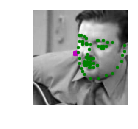

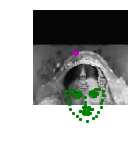

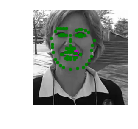

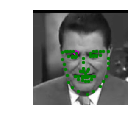

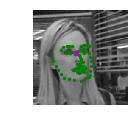

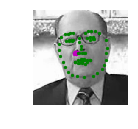

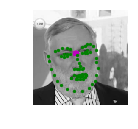

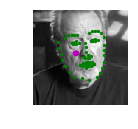

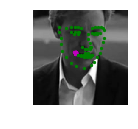

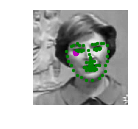

In [13]:
# visualize the output
# by default this shows a batch of 10 images
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):

    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)

        # un-transform the image data
        image = test_images[i].data   # get the image from it's Variable wrapper
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

        # un-transform the predicted key_pts data
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy()
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100
        
        # plot ground truth points for comparison, if they exist
        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
        
        # call show_all_keypoints
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
            
        plt.axis('off')

    plt.show()
    
# call it
visualize_output(test_images, test_outputs, gt_pts)

## Training

#### Loss function
Training a network to predict keypoints is different than training a network to predict a class; instead of outputting a distribution of classes and using cross entropy loss, you may want to choose a loss function that is suited for regression, which directly compares a predicted value and target value. Read about the various kinds of loss functions (like MSE or L1/SmoothL1 loss) in [this documentation](http://pytorch.org/docs/master/_modules/torch/nn/modules/loss.html).

### TODO: Define the loss and optimization

Next, you'll define how the model will train by deciding on the loss function and optimizer.

---

In [14]:
## TODO: Define the loss and optimization
import torch.optim as optim

criterion = nn.MSELoss()

optimizer = optim.Adam(params = net.parameters(), lr = 0.001)

## Training and Initial Observation

Now, you'll train on your batched training data from `train_loader` for a number of epochs. 

To quickly observe how your model is training and decide on whether or not you should modify it's structure or hyperparameters, you're encouraged to start off with just one or two epochs at first. As you train, note how your the model's loss behaves over time: does it decrease quickly at first and then slow down? Does it take a while to decrease in the first place? What happens if you change the batch size of your training data or modify your loss function? etc. 

Use these initial observations to make changes to your model and decide on the best architecture before you train for many epochs and create a final model.

In [15]:
def train_net(n_epochs):

    # prepare the net for training
    net.train()

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor)
            images = images.type(torch.FloatTensor)

            # forward pass to get outputs
            output_pts = net(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()

            # print loss statistics
            running_loss += loss.item()
            if batch_i % 10 == 9:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/10))
                running_loss = 0.0

    print('Finished Training')


In [17]:
# train your network
n_epochs = 35  # start small, and increase when you've decided on your model structure and hyperparams

# this is a Workspaces-specific context manager to keep the connection
# alive while training your model, not part of pytorch
with active_session():
    train_net(n_epochs)

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 1, Batch: 10, Avg. Loss: 0.22845034003257753
Epoch: 1, Batch: 20, Avg. Loss: 0.19278110265731813
Epoch: 1, Batch: 30, Avg. Loss: 0.19840552359819413
Epoch: 1, Batch: 40, Avg. Loss: 0.18503531515598298
Epoch: 1, Batch: 50, Avg. Loss: 0.2723731264472008
Epoch: 1, Batch: 60, Avg. Loss: 0.21100788563489914
Epoch: 1, Batch: 70, Avg. Loss: 0.2870273321866989
Epoch: 1, Batch: 80, Avg. Loss: 0.24812693670392036
Epoch: 1, Batch: 90, Avg. Loss: 0.30278025269508363
Epoch: 1, Batch: 100, Avg. Loss: 0.24036640226840972
Epoch: 1, Batch: 110, Avg. Loss: 0.19324452430009842
Epoch: 1, Batch: 120, Avg. Loss: 0.20044360011816026
Epoch: 1, Batch: 130, Avg. Loss: 0.2039060562849045
Epoch: 1, Batch: 140, Avg. Loss: 0.20097960904240608
Epoch: 1, Batch: 150, Avg. Loss: 0.18793074563145637
Epoch: 1, Batch: 160, Avg. Loss: 0.22094086408615113
Epoch: 1, Batch: 170, Avg. Loss: 0.18691493272781373
Epoch: 1, Batch: 180, Avg. Loss: 0.19270971789956093
Epoch: 1, Batch: 190, Avg. Loss: 0.19263669475913048
Epoch

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 2, Batch: 10, Avg. Loss: 0.19613931700587273
Epoch: 2, Batch: 20, Avg. Loss: 0.20638205483555794
Epoch: 2, Batch: 30, Avg. Loss: 0.20588819906115532
Epoch: 2, Batch: 40, Avg. Loss: 0.1941870629787445
Epoch: 2, Batch: 50, Avg. Loss: 0.21603512540459632
Epoch: 2, Batch: 60, Avg. Loss: 0.19108396247029305
Epoch: 2, Batch: 70, Avg. Loss: 0.21943531632423402
Epoch: 2, Batch: 80, Avg. Loss: 0.21900328993797302
Epoch: 2, Batch: 90, Avg. Loss: 0.24039271771907805
Epoch: 2, Batch: 100, Avg. Loss: 0.1963214695453644
Epoch: 2, Batch: 110, Avg. Loss: 0.17177043482661247
Epoch: 2, Batch: 120, Avg. Loss: 0.187749482691288
Epoch: 2, Batch: 130, Avg. Loss: 0.17333290576934815
Epoch: 2, Batch: 140, Avg. Loss: 0.16826864778995515
Epoch: 2, Batch: 150, Avg. Loss: 0.16031872294843197
Epoch: 2, Batch: 160, Avg. Loss: 0.18246714398264885
Epoch: 2, Batch: 170, Avg. Loss: 0.17675813436508178
Epoch: 2, Batch: 180, Avg. Loss: 0.17378014028072358
Epoch: 2, Batch: 190, Avg. Loss: 0.16615482792258263
Epoch:

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 3, Batch: 10, Avg. Loss: 0.1650493822991848
Epoch: 3, Batch: 20, Avg. Loss: 0.14689834043383598
Epoch: 3, Batch: 30, Avg. Loss: 0.19468773007392884
Epoch: 3, Batch: 40, Avg. Loss: 0.17478162199258804
Epoch: 3, Batch: 50, Avg. Loss: 0.16975130066275596
Epoch: 3, Batch: 60, Avg. Loss: 0.15278354063630104
Epoch: 3, Batch: 70, Avg. Loss: 0.21938197910785676
Epoch: 3, Batch: 80, Avg. Loss: 0.24237310737371445
Epoch: 3, Batch: 90, Avg. Loss: 0.17195143178105354
Epoch: 3, Batch: 100, Avg. Loss: 0.17892887443304062
Epoch: 3, Batch: 110, Avg. Loss: 0.1325620725750923
Epoch: 3, Batch: 120, Avg. Loss: 0.22366710975766183
Epoch: 3, Batch: 130, Avg. Loss: 0.16579041704535485
Epoch: 3, Batch: 140, Avg. Loss: 0.15303225964307784
Epoch: 3, Batch: 150, Avg. Loss: 0.15649062618613244
Epoch: 3, Batch: 160, Avg. Loss: 0.17761130556464194
Epoch: 3, Batch: 170, Avg. Loss: 0.1541749082505703
Epoch: 3, Batch: 180, Avg. Loss: 0.19629737138748168
Epoch: 3, Batch: 190, Avg. Loss: 0.12964379861950875
Epoch

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 4, Batch: 10, Avg. Loss: 0.13314877040684223
Epoch: 4, Batch: 20, Avg. Loss: 0.19046634212136268
Epoch: 4, Batch: 30, Avg. Loss: 0.1428137481212616
Epoch: 4, Batch: 40, Avg. Loss: 0.1533545508980751
Epoch: 4, Batch: 50, Avg. Loss: 0.18185731619596482
Epoch: 4, Batch: 60, Avg. Loss: 0.21337634101510047
Epoch: 4, Batch: 70, Avg. Loss: 0.17263451889157294
Epoch: 4, Batch: 80, Avg. Loss: 0.17448135167360307
Epoch: 4, Batch: 90, Avg. Loss: 0.1621759094297886
Epoch: 4, Batch: 100, Avg. Loss: 0.18345282301306726
Epoch: 4, Batch: 110, Avg. Loss: 0.17056657299399375
Epoch: 4, Batch: 120, Avg. Loss: 0.16425421386957167
Epoch: 4, Batch: 130, Avg. Loss: 0.12461789846420288
Epoch: 4, Batch: 140, Avg. Loss: 0.16095346361398696
Epoch: 4, Batch: 150, Avg. Loss: 0.14746298640966415
Epoch: 4, Batch: 160, Avg. Loss: 0.15396023988723756
Epoch: 4, Batch: 170, Avg. Loss: 0.1711037028580904
Epoch: 4, Batch: 180, Avg. Loss: 0.15649633929133416
Epoch: 4, Batch: 190, Avg. Loss: 0.18826074302196502
Epoch:

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 5, Batch: 10, Avg. Loss: 0.14242021813988687
Epoch: 5, Batch: 20, Avg. Loss: 0.1145109198987484
Epoch: 5, Batch: 30, Avg. Loss: 0.16325263306498528
Epoch: 5, Batch: 40, Avg. Loss: 0.17374434247612952
Epoch: 5, Batch: 50, Avg. Loss: 0.14867146834731101
Epoch: 5, Batch: 60, Avg. Loss: 0.1669594466686249
Epoch: 5, Batch: 70, Avg. Loss: 0.16467000618577005
Epoch: 5, Batch: 80, Avg. Loss: 0.23022864609956742
Epoch: 5, Batch: 90, Avg. Loss: 0.13017676398158073
Epoch: 5, Batch: 100, Avg. Loss: 0.15863341614603996
Epoch: 5, Batch: 110, Avg. Loss: 0.14592544063925744
Epoch: 5, Batch: 120, Avg. Loss: 0.17569888830184938
Epoch: 5, Batch: 130, Avg. Loss: 0.13809542432427407
Epoch: 5, Batch: 140, Avg. Loss: 0.15085730105638503
Epoch: 5, Batch: 150, Avg. Loss: 0.15795716419816017
Epoch: 5, Batch: 160, Avg. Loss: 0.15202085971832274
Epoch: 5, Batch: 170, Avg. Loss: 0.21998143196105957
Epoch: 5, Batch: 180, Avg. Loss: 0.1995410479605198
Epoch: 5, Batch: 190, Avg. Loss: 0.15870020240545274
Epoch

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 6, Batch: 10, Avg. Loss: 0.14519059658050537
Epoch: 6, Batch: 20, Avg. Loss: 0.14198053628206253
Epoch: 6, Batch: 30, Avg. Loss: 0.13662037178874015
Epoch: 6, Batch: 40, Avg. Loss: 0.17844930961728095
Epoch: 6, Batch: 50, Avg. Loss: 0.1446724869310856
Epoch: 6, Batch: 60, Avg. Loss: 0.12208942398428917
Epoch: 6, Batch: 70, Avg. Loss: 0.1366724193096161
Epoch: 6, Batch: 80, Avg. Loss: 0.1655510649085045
Epoch: 6, Batch: 90, Avg. Loss: 0.1552741251885891
Epoch: 6, Batch: 100, Avg. Loss: 0.14661516696214677
Epoch: 6, Batch: 110, Avg. Loss: 0.15153664499521255
Epoch: 6, Batch: 120, Avg. Loss: 0.16548217162489892
Epoch: 6, Batch: 130, Avg. Loss: 0.14124360159039498
Epoch: 6, Batch: 140, Avg. Loss: 0.15089114978909493
Epoch: 6, Batch: 150, Avg. Loss: 0.17858727648854256
Epoch: 6, Batch: 160, Avg. Loss: 0.15573600083589553
Epoch: 6, Batch: 170, Avg. Loss: 0.14721443876624107
Epoch: 6, Batch: 180, Avg. Loss: 0.16383599415421485
Epoch: 6, Batch: 190, Avg. Loss: 0.11083592176437378
Epoch:

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 7, Batch: 10, Avg. Loss: 0.12134281471371651
Epoch: 7, Batch: 20, Avg. Loss: 0.1807423062622547
Epoch: 7, Batch: 30, Avg. Loss: 0.13612740188837053
Epoch: 7, Batch: 40, Avg. Loss: 0.17117298468947412
Epoch: 7, Batch: 50, Avg. Loss: 0.17525014653801918
Epoch: 7, Batch: 60, Avg. Loss: 0.16524838730692865
Epoch: 7, Batch: 70, Avg. Loss: 0.1264153964817524
Epoch: 7, Batch: 80, Avg. Loss: 0.13706860393285752
Epoch: 7, Batch: 90, Avg. Loss: 0.15103884935379028
Epoch: 7, Batch: 100, Avg. Loss: 0.15836086869239807
Epoch: 7, Batch: 110, Avg. Loss: 0.12978164926171304
Epoch: 7, Batch: 120, Avg. Loss: 0.1630307834595442
Epoch: 7, Batch: 130, Avg. Loss: 0.1718842551112175
Epoch: 7, Batch: 140, Avg. Loss: 0.38775295913219454
Epoch: 7, Batch: 150, Avg. Loss: 0.1339707590639591
Epoch: 7, Batch: 160, Avg. Loss: 0.12201518639922142
Epoch: 7, Batch: 170, Avg. Loss: 0.15678702145814896
Epoch: 7, Batch: 180, Avg. Loss: 0.16163437888026239
Epoch: 7, Batch: 190, Avg. Loss: 0.24365676529705524
Epoch: 

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 8, Batch: 10, Avg. Loss: 0.1645316921174526
Epoch: 8, Batch: 20, Avg. Loss: 0.11982019729912281
Epoch: 8, Batch: 30, Avg. Loss: 0.17801599726080894
Epoch: 8, Batch: 40, Avg. Loss: 0.1665481485426426
Epoch: 8, Batch: 50, Avg. Loss: 0.14381900280714036
Epoch: 8, Batch: 60, Avg. Loss: 0.10566809549927711
Epoch: 8, Batch: 70, Avg. Loss: 0.13768425732851028
Epoch: 8, Batch: 80, Avg. Loss: 0.1372638761997223
Epoch: 8, Batch: 90, Avg. Loss: 0.17362830564379692
Epoch: 8, Batch: 100, Avg. Loss: 0.1417305886745453
Epoch: 8, Batch: 110, Avg. Loss: 0.13679950013756753
Epoch: 8, Batch: 120, Avg. Loss: 0.1460679866373539
Epoch: 8, Batch: 130, Avg. Loss: 0.13214646950364112
Epoch: 8, Batch: 140, Avg. Loss: 0.12123860195279121
Epoch: 8, Batch: 150, Avg. Loss: 0.14954345673322678
Epoch: 8, Batch: 160, Avg. Loss: 0.1340420201420784
Epoch: 8, Batch: 170, Avg. Loss: 0.15305549502372742
Epoch: 8, Batch: 180, Avg. Loss: 0.1806333139538765
Epoch: 8, Batch: 190, Avg. Loss: 0.12085655480623245
Epoch: 8,

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 9, Batch: 10, Avg. Loss: 0.1432989075779915
Epoch: 9, Batch: 20, Avg. Loss: 0.11918487809598446
Epoch: 9, Batch: 30, Avg. Loss: 0.18749113902449607
Epoch: 9, Batch: 40, Avg. Loss: 0.14180758595466614
Epoch: 9, Batch: 50, Avg. Loss: 0.14026013389229774
Epoch: 9, Batch: 60, Avg. Loss: 0.14105782508850098
Epoch: 9, Batch: 70, Avg. Loss: 0.12393406629562378
Epoch: 9, Batch: 80, Avg. Loss: 0.1729462333023548
Epoch: 9, Batch: 90, Avg. Loss: 0.15811966955661774
Epoch: 9, Batch: 100, Avg. Loss: 0.1475842408835888
Epoch: 9, Batch: 110, Avg. Loss: 0.13162773102521896
Epoch: 9, Batch: 120, Avg. Loss: 0.0922977801412344
Epoch: 9, Batch: 130, Avg. Loss: 0.137722647190094
Epoch: 9, Batch: 140, Avg. Loss: 0.12305317893624305
Epoch: 9, Batch: 150, Avg. Loss: 0.1556074723601341
Epoch: 9, Batch: 160, Avg. Loss: 0.14797400459647178
Epoch: 9, Batch: 170, Avg. Loss: 0.1387781035155058
Epoch: 9, Batch: 180, Avg. Loss: 0.1466436892747879
Epoch: 9, Batch: 190, Avg. Loss: 0.11580559089779854
Epoch: 9, B

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 10, Batch: 10, Avg. Loss: 0.07371353209018708
Epoch: 10, Batch: 20, Avg. Loss: 0.09723121374845504
Epoch: 10, Batch: 30, Avg. Loss: 0.10708240866661071
Epoch: 10, Batch: 40, Avg. Loss: 0.08723149225115776
Epoch: 10, Batch: 50, Avg. Loss: 0.11232342347502708
Epoch: 10, Batch: 60, Avg. Loss: 0.10563724674284458
Epoch: 10, Batch: 70, Avg. Loss: 0.08595403172075748
Epoch: 10, Batch: 80, Avg. Loss: 0.15431477092206478
Epoch: 10, Batch: 90, Avg. Loss: 0.10450138300657272
Epoch: 10, Batch: 100, Avg. Loss: 0.1125974752008915
Epoch: 10, Batch: 110, Avg. Loss: 0.08191178329288959
Epoch: 10, Batch: 120, Avg. Loss: 0.12297316640615463
Epoch: 10, Batch: 130, Avg. Loss: 0.08935850486159325
Epoch: 10, Batch: 140, Avg. Loss: 0.15358765423297882
Epoch: 10, Batch: 150, Avg. Loss: 0.09850730635225773
Epoch: 10, Batch: 160, Avg. Loss: 0.09787677489221096
Epoch: 10, Batch: 170, Avg. Loss: 0.3139073297381401
Epoch: 10, Batch: 180, Avg. Loss: 0.10018200352787972
Epoch: 10, Batch: 190, Avg. Loss: 0.109

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 11, Batch: 10, Avg. Loss: 0.08574973233044147
Epoch: 11, Batch: 20, Avg. Loss: 0.10471018329262734
Epoch: 11, Batch: 30, Avg. Loss: 0.11066903248429298
Epoch: 11, Batch: 40, Avg. Loss: 0.09080212265253067
Epoch: 11, Batch: 50, Avg. Loss: 0.10293262787163257
Epoch: 11, Batch: 60, Avg. Loss: 0.08867720477283
Epoch: 11, Batch: 70, Avg. Loss: 0.08269547559320926
Epoch: 11, Batch: 80, Avg. Loss: 0.09756886139512062
Epoch: 11, Batch: 90, Avg. Loss: 0.09742462188005448
Epoch: 11, Batch: 100, Avg. Loss: 0.09608707651495933
Epoch: 11, Batch: 110, Avg. Loss: 0.10090123787522316
Epoch: 11, Batch: 120, Avg. Loss: 0.31464631035923957
Epoch: 11, Batch: 130, Avg. Loss: 0.10012307316064835
Epoch: 11, Batch: 140, Avg. Loss: 0.07816535793244839
Epoch: 11, Batch: 150, Avg. Loss: 0.10186054594814778
Epoch: 11, Batch: 160, Avg. Loss: 0.09031297191977501
Epoch: 11, Batch: 170, Avg. Loss: 0.12279596477746964
Epoch: 11, Batch: 180, Avg. Loss: 0.10205297023057938
Epoch: 11, Batch: 190, Avg. Loss: 0.0908

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 12, Batch: 10, Avg. Loss: 0.16274446211755275
Epoch: 12, Batch: 20, Avg. Loss: 0.15876646265387534
Epoch: 12, Batch: 30, Avg. Loss: 0.12092507481575013
Epoch: 12, Batch: 40, Avg. Loss: 0.09050734043121338
Epoch: 12, Batch: 50, Avg. Loss: 0.09224290512502194
Epoch: 12, Batch: 60, Avg. Loss: 0.0792938694357872
Epoch: 12, Batch: 70, Avg. Loss: 0.10415259338915347
Epoch: 12, Batch: 80, Avg. Loss: 0.10366582982242108
Epoch: 12, Batch: 90, Avg. Loss: 0.12215221785008908
Epoch: 12, Batch: 100, Avg. Loss: 0.09152073822915555
Epoch: 12, Batch: 110, Avg. Loss: 0.07872892916202545
Epoch: 12, Batch: 120, Avg. Loss: 0.08090026192367077
Epoch: 12, Batch: 130, Avg. Loss: 0.06874750666320324
Epoch: 12, Batch: 140, Avg. Loss: 0.0808426182717085
Epoch: 12, Batch: 150, Avg. Loss: 0.09891219474375249
Epoch: 12, Batch: 160, Avg. Loss: 0.0808209866285324
Epoch: 12, Batch: 170, Avg. Loss: 0.15052549540996552
Epoch: 12, Batch: 180, Avg. Loss: 0.08603388853371144
Epoch: 12, Batch: 190, Avg. Loss: 0.0720

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 13, Batch: 10, Avg. Loss: 0.12968188300728797
Epoch: 13, Batch: 20, Avg. Loss: 0.0895406611263752
Epoch: 13, Batch: 30, Avg. Loss: 0.07503394261002541
Epoch: 13, Batch: 40, Avg. Loss: 0.08882966302335263
Epoch: 13, Batch: 50, Avg. Loss: 0.08563812784850597
Epoch: 13, Batch: 60, Avg. Loss: 0.08058006763458252
Epoch: 13, Batch: 70, Avg. Loss: 0.08066346347332001
Epoch: 13, Batch: 80, Avg. Loss: 0.0760215163230896
Epoch: 13, Batch: 90, Avg. Loss: 0.09044951349496841
Epoch: 13, Batch: 100, Avg. Loss: 0.12022040821611882
Epoch: 13, Batch: 110, Avg. Loss: 0.09521008841693401
Epoch: 13, Batch: 120, Avg. Loss: 0.09247064515948296
Epoch: 13, Batch: 130, Avg. Loss: 0.13778254054486752
Epoch: 13, Batch: 140, Avg. Loss: 0.07797982357442379
Epoch: 13, Batch: 150, Avg. Loss: 0.0751932157203555
Epoch: 13, Batch: 160, Avg. Loss: 0.09682035632431507
Epoch: 13, Batch: 170, Avg. Loss: 0.0886776588857174
Epoch: 13, Batch: 180, Avg. Loss: 0.09714627675712109
Epoch: 13, Batch: 190, Avg. Loss: 0.11157

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 14, Batch: 10, Avg. Loss: 0.0958546657115221
Epoch: 14, Batch: 20, Avg. Loss: 0.11056512929499149
Epoch: 14, Batch: 30, Avg. Loss: 0.0858183778822422
Epoch: 14, Batch: 40, Avg. Loss: 0.08472294062376022
Epoch: 14, Batch: 50, Avg. Loss: 0.08511879816651344
Epoch: 14, Batch: 60, Avg. Loss: 0.09021428339183331
Epoch: 14, Batch: 70, Avg. Loss: 0.0936404213309288
Epoch: 14, Batch: 80, Avg. Loss: 0.07280842997133732
Epoch: 14, Batch: 90, Avg. Loss: 0.0849221907556057
Epoch: 14, Batch: 100, Avg. Loss: 0.07490384504199028
Epoch: 14, Batch: 110, Avg. Loss: 0.120035095885396
Epoch: 14, Batch: 120, Avg. Loss: 0.09085130877792835
Epoch: 14, Batch: 130, Avg. Loss: 0.07234277427196503
Epoch: 14, Batch: 140, Avg. Loss: 0.10069332383573056
Epoch: 14, Batch: 150, Avg. Loss: 0.08099840451031923
Epoch: 14, Batch: 160, Avg. Loss: 0.07827875427901745
Epoch: 14, Batch: 170, Avg. Loss: 0.07042497992515565
Epoch: 14, Batch: 180, Avg. Loss: 0.09246418476104737
Epoch: 14, Batch: 190, Avg. Loss: 0.0576771

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 15, Batch: 10, Avg. Loss: 0.07911617420613766
Epoch: 15, Batch: 20, Avg. Loss: 0.08435124382376671
Epoch: 15, Batch: 30, Avg. Loss: 0.22351548485457898
Epoch: 15, Batch: 40, Avg. Loss: 0.0996901337057352
Epoch: 15, Batch: 50, Avg. Loss: 0.12664011865854263
Epoch: 15, Batch: 60, Avg. Loss: 0.10535813160240651
Epoch: 15, Batch: 70, Avg. Loss: 0.06782669983804226
Epoch: 15, Batch: 80, Avg. Loss: 0.16582734920084477
Epoch: 15, Batch: 90, Avg. Loss: 0.08580105006694794
Epoch: 15, Batch: 100, Avg. Loss: 0.09076431356370449
Epoch: 15, Batch: 110, Avg. Loss: 0.08841263204813003
Epoch: 15, Batch: 120, Avg. Loss: 0.07488351240754128
Epoch: 15, Batch: 130, Avg. Loss: 0.09258688129484653
Epoch: 15, Batch: 140, Avg. Loss: 0.09112931787967682
Epoch: 15, Batch: 150, Avg. Loss: 0.08538322821259499
Epoch: 15, Batch: 160, Avg. Loss: 0.06539523676037788
Epoch: 15, Batch: 170, Avg. Loss: 0.1190833393484354
Epoch: 15, Batch: 180, Avg. Loss: 0.07708856798708438
Epoch: 15, Batch: 190, Avg. Loss: 0.080

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 16, Batch: 10, Avg. Loss: 0.07717761769890785
Epoch: 16, Batch: 20, Avg. Loss: 0.06811529733240604
Epoch: 16, Batch: 30, Avg. Loss: 0.07002147100865841
Epoch: 16, Batch: 40, Avg. Loss: 0.0685029573738575
Epoch: 16, Batch: 50, Avg. Loss: 0.07333516031503677
Epoch: 16, Batch: 60, Avg. Loss: 0.12617989704012872
Epoch: 16, Batch: 70, Avg. Loss: 0.07802175879478454
Epoch: 16, Batch: 80, Avg. Loss: 0.09651775248348712
Epoch: 16, Batch: 90, Avg. Loss: 0.07387308701872826
Epoch: 16, Batch: 100, Avg. Loss: 0.06441498920321465
Epoch: 16, Batch: 110, Avg. Loss: 0.06805932000279427
Epoch: 16, Batch: 120, Avg. Loss: 0.21082077100872992
Epoch: 16, Batch: 130, Avg. Loss: 0.09654127545654774
Epoch: 16, Batch: 140, Avg. Loss: 0.06471736282110215
Epoch: 16, Batch: 150, Avg. Loss: 0.08716727197170257
Epoch: 16, Batch: 160, Avg. Loss: 0.07806038558483124
Epoch: 16, Batch: 170, Avg. Loss: 0.057397978752851485
Epoch: 16, Batch: 180, Avg. Loss: 0.07550925873219967
Epoch: 16, Batch: 190, Avg. Loss: 0.1

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 17, Batch: 10, Avg. Loss: 0.06415845677256585
Epoch: 17, Batch: 20, Avg. Loss: 0.07454299926757812
Epoch: 17, Batch: 30, Avg. Loss: 0.06464380268007516
Epoch: 17, Batch: 40, Avg. Loss: 0.06487967018038035
Epoch: 17, Batch: 50, Avg. Loss: 0.07945606112480164
Epoch: 17, Batch: 60, Avg. Loss: 0.0759519588202238
Epoch: 17, Batch: 70, Avg. Loss: 0.22746041528880595
Epoch: 17, Batch: 80, Avg. Loss: 0.1591366559267044
Epoch: 17, Batch: 90, Avg. Loss: 0.08419348113238811
Epoch: 17, Batch: 100, Avg. Loss: 0.07831070795655251
Epoch: 17, Batch: 110, Avg. Loss: 0.06274455189704894
Epoch: 17, Batch: 120, Avg. Loss: 0.08961934074759484
Epoch: 17, Batch: 130, Avg. Loss: 0.06378201134502888
Epoch: 17, Batch: 140, Avg. Loss: 0.06176205575466156
Epoch: 17, Batch: 150, Avg. Loss: 0.1399396315217018
Epoch: 17, Batch: 160, Avg. Loss: 0.07336691990494729
Epoch: 17, Batch: 170, Avg. Loss: 0.07783838789910077
Epoch: 17, Batch: 180, Avg. Loss: 0.1012751217931509
Epoch: 17, Batch: 190, Avg. Loss: 0.06281

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 18, Batch: 10, Avg. Loss: 0.10045393593609334
Epoch: 18, Batch: 20, Avg. Loss: 0.064843288064003
Epoch: 18, Batch: 30, Avg. Loss: 0.07089170664548874
Epoch: 18, Batch: 40, Avg. Loss: 0.06336365565657616
Epoch: 18, Batch: 50, Avg. Loss: 0.08243398517370223
Epoch: 18, Batch: 60, Avg. Loss: 0.06984403096139431
Epoch: 18, Batch: 70, Avg. Loss: 0.0579355388879776
Epoch: 18, Batch: 80, Avg. Loss: 0.06830110363662242
Epoch: 18, Batch: 90, Avg. Loss: 0.07008644267916679
Epoch: 18, Batch: 100, Avg. Loss: 0.0875441249459982
Epoch: 18, Batch: 110, Avg. Loss: 0.05855176448822021
Epoch: 18, Batch: 120, Avg. Loss: 0.06934052407741546
Epoch: 18, Batch: 130, Avg. Loss: 0.08028263375163078
Epoch: 18, Batch: 140, Avg. Loss: 0.06609106622636318
Epoch: 18, Batch: 150, Avg. Loss: 0.06478279903531074
Epoch: 18, Batch: 160, Avg. Loss: 0.07041822858154774
Epoch: 18, Batch: 170, Avg. Loss: 0.06378254517912865
Epoch: 18, Batch: 180, Avg. Loss: 0.06361044608056546
Epoch: 18, Batch: 190, Avg. Loss: 0.05501

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 19, Batch: 10, Avg. Loss: 0.05714019201695919
Epoch: 19, Batch: 20, Avg. Loss: 0.059719502553343774
Epoch: 19, Batch: 30, Avg. Loss: 0.15539899468421936
Epoch: 19, Batch: 40, Avg. Loss: 0.11525089368224144
Epoch: 19, Batch: 50, Avg. Loss: 0.08189269453287125
Epoch: 19, Batch: 60, Avg. Loss: 0.07212135270237922
Epoch: 19, Batch: 70, Avg. Loss: 0.07308816313743591
Epoch: 19, Batch: 80, Avg. Loss: 0.060977690294384955
Epoch: 19, Batch: 90, Avg. Loss: 0.06302580870687961
Epoch: 19, Batch: 100, Avg. Loss: 0.14517404623329638
Epoch: 19, Batch: 110, Avg. Loss: 0.06522476933896541
Epoch: 19, Batch: 120, Avg. Loss: 0.07685761712491512
Epoch: 19, Batch: 130, Avg. Loss: 0.06367953568696975
Epoch: 19, Batch: 140, Avg. Loss: 0.05946897678077221
Epoch: 19, Batch: 150, Avg. Loss: 0.07790133617818355
Epoch: 19, Batch: 160, Avg. Loss: 0.06619033701717854
Epoch: 19, Batch: 170, Avg. Loss: 0.08236605934798717
Epoch: 19, Batch: 180, Avg. Loss: 0.08445376232266426
Epoch: 19, Batch: 190, Avg. Loss: 0

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 20, Batch: 10, Avg. Loss: 0.06990942880511283
Epoch: 20, Batch: 20, Avg. Loss: 0.0720927134156227
Epoch: 20, Batch: 30, Avg. Loss: 0.05583348162472248
Epoch: 20, Batch: 40, Avg. Loss: 0.07790279909968376
Epoch: 20, Batch: 50, Avg. Loss: 0.19718745090067386
Epoch: 20, Batch: 60, Avg. Loss: 0.06689533926546573
Epoch: 20, Batch: 70, Avg. Loss: 0.05770850609987974
Epoch: 20, Batch: 80, Avg. Loss: 0.08304458670318127
Epoch: 20, Batch: 90, Avg. Loss: 0.06996085122227669
Epoch: 20, Batch: 100, Avg. Loss: 0.06015894822776317
Epoch: 20, Batch: 110, Avg. Loss: 0.20971329286694526
Epoch: 20, Batch: 120, Avg. Loss: 0.06851047202944756
Epoch: 20, Batch: 130, Avg. Loss: 0.08746997117996216
Epoch: 20, Batch: 140, Avg. Loss: 0.07286399342119694
Epoch: 20, Batch: 150, Avg. Loss: 0.058534453995525836
Epoch: 20, Batch: 160, Avg. Loss: 0.08051945678889752
Epoch: 20, Batch: 170, Avg. Loss: 0.06885240022093057
Epoch: 20, Batch: 180, Avg. Loss: 0.07911619693040847
Epoch: 20, Batch: 190, Avg. Loss: 0.0

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 21, Batch: 10, Avg. Loss: 0.05566416084766388
Epoch: 21, Batch: 20, Avg. Loss: 0.057974977791309355
Epoch: 21, Batch: 30, Avg. Loss: 0.06664681844413281
Epoch: 21, Batch: 40, Avg. Loss: 0.06107032187283039
Epoch: 21, Batch: 50, Avg. Loss: 0.07115891575813293
Epoch: 21, Batch: 60, Avg. Loss: 0.07966639548540115
Epoch: 21, Batch: 70, Avg. Loss: 0.06522377766668797
Epoch: 21, Batch: 80, Avg. Loss: 0.08222651667892933
Epoch: 21, Batch: 90, Avg. Loss: 0.05953036658465862
Epoch: 21, Batch: 100, Avg. Loss: 0.09999332726001739
Epoch: 21, Batch: 110, Avg. Loss: 0.20268106535077096
Epoch: 21, Batch: 120, Avg. Loss: 0.06651950087398291
Epoch: 21, Batch: 130, Avg. Loss: 0.06236679926514625
Epoch: 21, Batch: 140, Avg. Loss: 0.06626996360719203
Epoch: 21, Batch: 150, Avg. Loss: 0.08270136341452598
Epoch: 21, Batch: 160, Avg. Loss: 0.08615859523415566
Epoch: 21, Batch: 170, Avg. Loss: 0.06429687403142452
Epoch: 21, Batch: 180, Avg. Loss: 0.06916456297039986
Epoch: 21, Batch: 190, Avg. Loss: 0.

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 22, Batch: 10, Avg. Loss: 0.07704045157879591
Epoch: 22, Batch: 20, Avg. Loss: 0.08930680342018604
Epoch: 22, Batch: 30, Avg. Loss: 0.0700154047459364
Epoch: 22, Batch: 40, Avg. Loss: 0.07702519372105598
Epoch: 22, Batch: 50, Avg. Loss: 0.10336150079965592
Epoch: 22, Batch: 60, Avg. Loss: 0.0717214047908783
Epoch: 22, Batch: 70, Avg. Loss: 0.06449651792645454
Epoch: 22, Batch: 80, Avg. Loss: 0.055199044197797774
Epoch: 22, Batch: 90, Avg. Loss: 0.08282141890376807
Epoch: 22, Batch: 100, Avg. Loss: 0.11403221189975739
Epoch: 22, Batch: 110, Avg. Loss: 0.06786619015038013
Epoch: 22, Batch: 120, Avg. Loss: 0.06950694285333156
Epoch: 22, Batch: 130, Avg. Loss: 0.0722722664475441
Epoch: 22, Batch: 140, Avg. Loss: 0.08512350954115391
Epoch: 22, Batch: 150, Avg. Loss: 0.07614693865180015
Epoch: 22, Batch: 160, Avg. Loss: 0.0627079300582409
Epoch: 22, Batch: 170, Avg. Loss: 0.06603739969432354
Epoch: 22, Batch: 180, Avg. Loss: 0.0706523485481739
Epoch: 22, Batch: 190, Avg. Loss: 0.05165

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 23, Batch: 10, Avg. Loss: 0.05279034711420536
Epoch: 23, Batch: 20, Avg. Loss: 0.07796297259628773
Epoch: 23, Batch: 30, Avg. Loss: 0.06464621424674988
Epoch: 23, Batch: 40, Avg. Loss: 0.05780925564467907
Epoch: 23, Batch: 50, Avg. Loss: 0.07078289352357388
Epoch: 23, Batch: 60, Avg. Loss: 0.0766093261539936
Epoch: 23, Batch: 70, Avg. Loss: 0.047237401641905305
Epoch: 23, Batch: 80, Avg. Loss: 0.07235007882118225
Epoch: 23, Batch: 90, Avg. Loss: 0.07231875043362379
Epoch: 23, Batch: 100, Avg. Loss: 0.05799058005213738
Epoch: 23, Batch: 110, Avg. Loss: 0.05243256874382496
Epoch: 23, Batch: 120, Avg. Loss: 0.06639112010598183
Epoch: 23, Batch: 130, Avg. Loss: 0.070387177541852
Epoch: 23, Batch: 140, Avg. Loss: 0.07151757180690765
Epoch: 23, Batch: 150, Avg. Loss: 0.07572086304426193
Epoch: 23, Batch: 160, Avg. Loss: 0.06499253287911415
Epoch: 23, Batch: 170, Avg. Loss: 0.09976639822125435
Epoch: 23, Batch: 180, Avg. Loss: 0.07443007715046406
Epoch: 23, Batch: 190, Avg. Loss: 0.047

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 24, Batch: 10, Avg. Loss: 0.04796752762049437
Epoch: 24, Batch: 20, Avg. Loss: 0.07120412737131118
Epoch: 24, Batch: 30, Avg. Loss: 0.06762488670647145
Epoch: 24, Batch: 40, Avg. Loss: 0.059193557128310204
Epoch: 24, Batch: 50, Avg. Loss: 0.0622685506939888
Epoch: 24, Batch: 60, Avg. Loss: 0.06005575861781835
Epoch: 24, Batch: 70, Avg. Loss: 0.06078562401235103
Epoch: 24, Batch: 80, Avg. Loss: 0.07250126972794532
Epoch: 24, Batch: 90, Avg. Loss: 0.05932791531085968
Epoch: 24, Batch: 100, Avg. Loss: 0.07144683599472046
Epoch: 24, Batch: 110, Avg. Loss: 0.3091554418206215
Epoch: 24, Batch: 120, Avg. Loss: 0.06433880813419819
Epoch: 24, Batch: 130, Avg. Loss: 0.06822538226842881
Epoch: 24, Batch: 140, Avg. Loss: 0.05677822902798653
Epoch: 24, Batch: 150, Avg. Loss: 0.055413872376084326
Epoch: 24, Batch: 160, Avg. Loss: 0.07268467918038368
Epoch: 24, Batch: 170, Avg. Loss: 0.0556367602199316
Epoch: 24, Batch: 180, Avg. Loss: 0.0614366564899683
Epoch: 24, Batch: 190, Avg. Loss: 0.063

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 25, Batch: 10, Avg. Loss: 0.05909485295414925
Epoch: 25, Batch: 20, Avg. Loss: 0.059608356282114985
Epoch: 25, Batch: 30, Avg. Loss: 0.1465007971972227
Epoch: 25, Batch: 40, Avg. Loss: 0.06631471700966358
Epoch: 25, Batch: 50, Avg. Loss: 0.08119862452149391
Epoch: 25, Batch: 60, Avg. Loss: 0.053429653868079185
Epoch: 25, Batch: 70, Avg. Loss: 0.0521737540140748
Epoch: 25, Batch: 80, Avg. Loss: 0.05011913254857063
Epoch: 25, Batch: 90, Avg. Loss: 0.05271799508482218
Epoch: 25, Batch: 100, Avg. Loss: 0.04230403658002615
Epoch: 25, Batch: 110, Avg. Loss: 0.05983477793633938
Epoch: 25, Batch: 120, Avg. Loss: 0.052508975751698016
Epoch: 25, Batch: 130, Avg. Loss: 0.05140430927276611
Epoch: 25, Batch: 140, Avg. Loss: 0.09169404096901417
Epoch: 25, Batch: 150, Avg. Loss: 0.06117691472172737
Epoch: 25, Batch: 160, Avg. Loss: 0.050630179792642595
Epoch: 25, Batch: 170, Avg. Loss: 0.05022587403655052
Epoch: 25, Batch: 180, Avg. Loss: 0.0523068692535162
Epoch: 25, Batch: 190, Avg. Loss: 0.

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 26, Batch: 10, Avg. Loss: 0.053747276589274404
Epoch: 26, Batch: 20, Avg. Loss: 0.06004423070698976
Epoch: 26, Batch: 30, Avg. Loss: 0.07134076692163945
Epoch: 26, Batch: 40, Avg. Loss: 0.06593402773141861
Epoch: 26, Batch: 50, Avg. Loss: 0.06489099822938442
Epoch: 26, Batch: 60, Avg. Loss: 0.06572269406169653
Epoch: 26, Batch: 70, Avg. Loss: 0.048194908909499644
Epoch: 26, Batch: 80, Avg. Loss: 0.060099434480071066
Epoch: 26, Batch: 90, Avg. Loss: 0.06010888256132603
Epoch: 26, Batch: 100, Avg. Loss: 0.05279655158519745
Epoch: 26, Batch: 110, Avg. Loss: 0.0862750681117177
Epoch: 26, Batch: 120, Avg. Loss: 0.05689185857772827
Epoch: 26, Batch: 130, Avg. Loss: 0.04991492703557014
Epoch: 26, Batch: 140, Avg. Loss: 0.059767108783125876
Epoch: 26, Batch: 150, Avg. Loss: 0.06331005319952965
Epoch: 26, Batch: 160, Avg. Loss: 0.05063068084418774
Epoch: 26, Batch: 170, Avg. Loss: 0.04336653146892786
Epoch: 26, Batch: 180, Avg. Loss: 0.1167579397559166
Epoch: 26, Batch: 190, Avg. Loss: 0

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 27, Batch: 10, Avg. Loss: 0.04946832302957773
Epoch: 27, Batch: 20, Avg. Loss: 0.04899654090404511
Epoch: 27, Batch: 30, Avg. Loss: 0.05872161090373993
Epoch: 27, Batch: 40, Avg. Loss: 0.06683785244822502
Epoch: 27, Batch: 50, Avg. Loss: 0.11239811554551124
Epoch: 27, Batch: 60, Avg. Loss: 0.09445829503238201
Epoch: 27, Batch: 70, Avg. Loss: 0.07735197506844997
Epoch: 27, Batch: 80, Avg. Loss: 0.08184394966810941
Epoch: 27, Batch: 90, Avg. Loss: 0.07229285426437855
Epoch: 27, Batch: 100, Avg. Loss: 0.053827517107129096
Epoch: 27, Batch: 110, Avg. Loss: 0.06104888282716274
Epoch: 27, Batch: 120, Avg. Loss: 0.053049737215042116
Epoch: 27, Batch: 130, Avg. Loss: 0.06287005711346864
Epoch: 27, Batch: 140, Avg. Loss: 0.05815118104219437
Epoch: 27, Batch: 150, Avg. Loss: 0.08099514842033387
Epoch: 27, Batch: 160, Avg. Loss: 0.07977318800985814
Epoch: 27, Batch: 170, Avg. Loss: 0.05237570740282536
Epoch: 27, Batch: 180, Avg. Loss: 0.05400594361126423
Epoch: 27, Batch: 190, Avg. Loss: 0

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 28, Batch: 10, Avg. Loss: 0.06761471703648567
Epoch: 28, Batch: 20, Avg. Loss: 0.05136650763452053
Epoch: 28, Batch: 30, Avg. Loss: 0.13534818608313798
Epoch: 28, Batch: 40, Avg. Loss: 0.059470507130026815
Epoch: 28, Batch: 50, Avg. Loss: 0.06354171745479106
Epoch: 28, Batch: 60, Avg. Loss: 0.09409929513931274
Epoch: 28, Batch: 70, Avg. Loss: 0.05392504073679447
Epoch: 28, Batch: 80, Avg. Loss: 0.05718285702168942
Epoch: 28, Batch: 90, Avg. Loss: 0.06459299623966216
Epoch: 28, Batch: 100, Avg. Loss: 0.14427873753011228
Epoch: 28, Batch: 110, Avg. Loss: 0.05625188946723938
Epoch: 28, Batch: 120, Avg. Loss: 0.05882549099624157
Epoch: 28, Batch: 130, Avg. Loss: 0.05772911757230759
Epoch: 28, Batch: 140, Avg. Loss: 0.09043088275939226
Epoch: 28, Batch: 150, Avg. Loss: 0.07037279829382896
Epoch: 28, Batch: 160, Avg. Loss: 0.08032444529235364
Epoch: 28, Batch: 170, Avg. Loss: 0.07468491159379483
Epoch: 28, Batch: 180, Avg. Loss: 0.09124637506902218
Epoch: 28, Batch: 190, Avg. Loss: 0.

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 29, Batch: 10, Avg. Loss: 0.05902235582470894
Epoch: 29, Batch: 20, Avg. Loss: 0.1998129315674305
Epoch: 29, Batch: 30, Avg. Loss: 0.060078888386487964
Epoch: 29, Batch: 40, Avg. Loss: 0.07567935474216939
Epoch: 29, Batch: 50, Avg. Loss: 0.058077200502157214
Epoch: 29, Batch: 60, Avg. Loss: 0.055611745826900004
Epoch: 29, Batch: 70, Avg. Loss: 0.06461055092513561
Epoch: 29, Batch: 80, Avg. Loss: 0.04903518632054329
Epoch: 29, Batch: 90, Avg. Loss: 0.04069070350378752
Epoch: 29, Batch: 100, Avg. Loss: 0.05418671183288097
Epoch: 29, Batch: 110, Avg. Loss: 0.06173446103930473
Epoch: 29, Batch: 120, Avg. Loss: 0.07379704341292381
Epoch: 29, Batch: 130, Avg. Loss: 0.07228641025722027
Epoch: 29, Batch: 140, Avg. Loss: 0.059125172533094884
Epoch: 29, Batch: 150, Avg. Loss: 0.057990354299545285
Epoch: 29, Batch: 160, Avg. Loss: 0.10066112503409386
Epoch: 29, Batch: 170, Avg. Loss: 0.05964791104197502
Epoch: 29, Batch: 180, Avg. Loss: 0.06230751276016235
Epoch: 29, Batch: 190, Avg. Loss:

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 30, Batch: 10, Avg. Loss: 0.06040686815977096
Epoch: 30, Batch: 20, Avg. Loss: 0.05560593418776989
Epoch: 30, Batch: 30, Avg. Loss: 0.06092690397053957
Epoch: 30, Batch: 40, Avg. Loss: 0.09426682703197002
Epoch: 30, Batch: 50, Avg. Loss: 0.05632341764867306
Epoch: 30, Batch: 60, Avg. Loss: 0.0659977462142706
Epoch: 30, Batch: 70, Avg. Loss: 0.1027179628610611
Epoch: 30, Batch: 80, Avg. Loss: 0.05442285835742951
Epoch: 30, Batch: 90, Avg. Loss: 0.05545995458960533
Epoch: 30, Batch: 100, Avg. Loss: 0.046190323680639266
Epoch: 30, Batch: 110, Avg. Loss: 0.046717549115419386
Epoch: 30, Batch: 120, Avg. Loss: 0.05690064914524555
Epoch: 30, Batch: 130, Avg. Loss: 0.08205800615251065
Epoch: 30, Batch: 140, Avg. Loss: 0.05690626800060272
Epoch: 30, Batch: 150, Avg. Loss: 0.05652846321463585
Epoch: 30, Batch: 160, Avg. Loss: 0.04568009078502655
Epoch: 30, Batch: 170, Avg. Loss: 0.09181685727089643
Epoch: 30, Batch: 180, Avg. Loss: 0.052596743777394296
Epoch: 30, Batch: 190, Avg. Loss: 0.

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 31, Batch: 10, Avg. Loss: 0.05203305222094059
Epoch: 31, Batch: 20, Avg. Loss: 0.06360011398792267
Epoch: 31, Batch: 30, Avg. Loss: 0.04556236192584038
Epoch: 31, Batch: 40, Avg. Loss: 0.04857945777475834
Epoch: 31, Batch: 50, Avg. Loss: 0.054986425675451756
Epoch: 31, Batch: 60, Avg. Loss: 0.047149107605218885
Epoch: 31, Batch: 70, Avg. Loss: 0.0514686856418848
Epoch: 31, Batch: 80, Avg. Loss: 0.04903767928481102
Epoch: 31, Batch: 90, Avg. Loss: 0.07674969173967838
Epoch: 31, Batch: 100, Avg. Loss: 0.05591273084282875
Epoch: 31, Batch: 110, Avg. Loss: 0.056812115386128424
Epoch: 31, Batch: 120, Avg. Loss: 0.07050258498638869
Epoch: 31, Batch: 130, Avg. Loss: 0.07378348633646965
Epoch: 31, Batch: 140, Avg. Loss: 0.04104934968054295
Epoch: 31, Batch: 150, Avg. Loss: 0.25427472218871117
Epoch: 31, Batch: 160, Avg. Loss: 0.07100526541471482
Epoch: 31, Batch: 170, Avg. Loss: 0.06649978365749121
Epoch: 31, Batch: 180, Avg. Loss: 0.048439881205558775
Epoch: 31, Batch: 190, Avg. Loss: 

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 32, Batch: 10, Avg. Loss: 0.06532867327332496
Epoch: 32, Batch: 20, Avg. Loss: 0.06758311893790961
Epoch: 32, Batch: 30, Avg. Loss: 0.07414881438016892
Epoch: 32, Batch: 40, Avg. Loss: 0.050141599215567115
Epoch: 32, Batch: 50, Avg. Loss: 0.0570334929972887
Epoch: 32, Batch: 60, Avg. Loss: 0.05798909179866314
Epoch: 32, Batch: 70, Avg. Loss: 0.06881943624466658
Epoch: 32, Batch: 80, Avg. Loss: 0.06366965062916279
Epoch: 32, Batch: 90, Avg. Loss: 0.06799960285425186
Epoch: 32, Batch: 100, Avg. Loss: 0.0683029405772686
Epoch: 32, Batch: 110, Avg. Loss: 0.051931078732013705
Epoch: 32, Batch: 120, Avg. Loss: 0.07733817398548126
Epoch: 32, Batch: 130, Avg. Loss: 0.054263599961996076
Epoch: 32, Batch: 140, Avg. Loss: 0.06033256985247135
Epoch: 32, Batch: 150, Avg. Loss: 0.06426221318542957
Epoch: 32, Batch: 160, Avg. Loss: 0.05021549500524998
Epoch: 32, Batch: 170, Avg. Loss: 0.08121470622718334
Epoch: 32, Batch: 180, Avg. Loss: 0.05648014694452286
Epoch: 32, Batch: 190, Avg. Loss: 0.

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 33, Batch: 10, Avg. Loss: 0.0695533448830247
Epoch: 33, Batch: 20, Avg. Loss: 0.06628676503896713
Epoch: 33, Batch: 30, Avg. Loss: 0.04427365977317095
Epoch: 33, Batch: 40, Avg. Loss: 0.06481918301433325
Epoch: 33, Batch: 50, Avg. Loss: 0.07780653238296509
Epoch: 33, Batch: 60, Avg. Loss: 0.05517172534018755
Epoch: 33, Batch: 70, Avg. Loss: 0.051114565879106524
Epoch: 33, Batch: 80, Avg. Loss: 0.07271472215652466
Epoch: 33, Batch: 90, Avg. Loss: 0.05816425234079361
Epoch: 33, Batch: 100, Avg. Loss: 0.17639769222587348
Epoch: 33, Batch: 110, Avg. Loss: 0.07191597744822502
Epoch: 33, Batch: 120, Avg. Loss: 0.056381574273109435
Epoch: 33, Batch: 130, Avg. Loss: 0.055882498249411584
Epoch: 33, Batch: 140, Avg. Loss: 0.0649482797831297
Epoch: 33, Batch: 150, Avg. Loss: 0.04892156533896923
Epoch: 33, Batch: 160, Avg. Loss: 0.045878182910382745
Epoch: 33, Batch: 170, Avg. Loss: 0.09235498867928982
Epoch: 33, Batch: 180, Avg. Loss: 0.09122079834342003
Epoch: 33, Batch: 190, Avg. Loss: 0

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 34, Batch: 10, Avg. Loss: 0.07742460072040558
Epoch: 34, Batch: 20, Avg. Loss: 0.13657360523939133
Epoch: 34, Batch: 30, Avg. Loss: 0.05243874378502369
Epoch: 34, Batch: 40, Avg. Loss: 0.05542860589921474
Epoch: 34, Batch: 50, Avg. Loss: 0.061174390092492106
Epoch: 34, Batch: 60, Avg. Loss: 0.06620578542351722
Epoch: 34, Batch: 70, Avg. Loss: 0.045545388385653494
Epoch: 34, Batch: 80, Avg. Loss: 0.05940848961472511
Epoch: 34, Batch: 90, Avg. Loss: 0.054140624776482585
Epoch: 34, Batch: 100, Avg. Loss: 0.060433576628565785
Epoch: 34, Batch: 110, Avg. Loss: 0.053361969999969006
Epoch: 34, Batch: 120, Avg. Loss: 0.06419735476374626
Epoch: 34, Batch: 130, Avg. Loss: 0.06130154319107532
Epoch: 34, Batch: 140, Avg. Loss: 0.062268093787133695
Epoch: 34, Batch: 150, Avg. Loss: 0.05309629589319229
Epoch: 34, Batch: 160, Avg. Loss: 0.056285100616514684
Epoch: 34, Batch: 170, Avg. Loss: 0.04773250874131918
Epoch: 34, Batch: 180, Avg. Loss: 0.06256659999489785
Epoch: 34, Batch: 190, Avg. Lo

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 35, Batch: 10, Avg. Loss: 0.08838760238140822
Epoch: 35, Batch: 20, Avg. Loss: 0.058552336692810056
Epoch: 35, Batch: 30, Avg. Loss: 0.07044206075370311
Epoch: 35, Batch: 40, Avg. Loss: 0.1033905602991581
Epoch: 35, Batch: 50, Avg. Loss: 0.06511338707059622
Epoch: 35, Batch: 60, Avg. Loss: 0.06439683772623539
Epoch: 35, Batch: 70, Avg. Loss: 0.03954015150666237
Epoch: 35, Batch: 80, Avg. Loss: 0.06068882681429386
Epoch: 35, Batch: 90, Avg. Loss: 0.05021284855902195
Epoch: 35, Batch: 100, Avg. Loss: 0.06365886218845844
Epoch: 35, Batch: 110, Avg. Loss: 0.045887730456888674
Epoch: 35, Batch: 120, Avg. Loss: 0.08206291459500789
Epoch: 35, Batch: 130, Avg. Loss: 0.0585936464369297
Epoch: 35, Batch: 140, Avg. Loss: 0.05569028705358505
Epoch: 35, Batch: 150, Avg. Loss: 0.051395890302956104
Epoch: 35, Batch: 160, Avg. Loss: 0.04698268286883831
Epoch: 35, Batch: 170, Avg. Loss: 0.05923635512590408
Epoch: 35, Batch: 180, Avg. Loss: 0.054849299415946004
Epoch: 35, Batch: 190, Avg. Loss: 0

## Test data

See how your model performs on previously unseen, test data. We've already loaded and transformed this data, similar to the training data. Next, run your trained model on these images to see what kind of keypoints are produced. You should be able to see if your model is fitting each new face it sees, if the points are distributed randomly, or if the points have actually overfitted the training data and do not generalize.

In [21]:
# get a sample of test data again
test_images, test_outputs, gt_Apts = net_sample_output()

print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


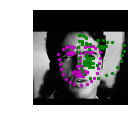

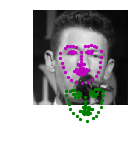

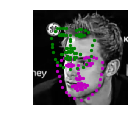

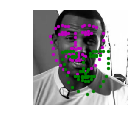

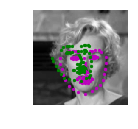

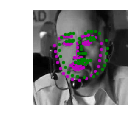

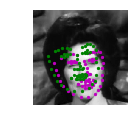

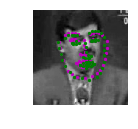

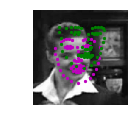

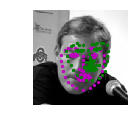

In [22]:
## TODO: visualize your test output
# you can use the same function as before, by un-commenting the line below:

visualize_output(test_images, test_outputs, gt_pts)


Once you've found a good model (or two), save your model so you can load it and use it later!

Save your models but please **delete any checkpoints and saved models before you submit your project** otherwise your workspace may be too large to submit.

In [23]:
## TODO: change the name to something uniqe for each new model
model_dir = 'saved_models/'
model_name = 'keypoints_face_wizard.pt'

# after training, save your model parameters in the dir 'saved_models'
torch.save(net.state_dict(), model_dir+model_name)
state_dict = torch.load(model_dir+model_name)
print(state_dict.keys())

odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'conv3.weight', 'conv3.bias', 'conv4.weight', 'conv4.bias', 'conv5.weight', 'conv5.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias'])


After you've trained a well-performing model, answer the following questions so that we have some insight into your training and architecture selection process. Answering all questions is required to pass this project.

### Question 1: What optimization and loss functions did you choose and why?


**Answer**: I chose Adam because it performs  faster than SGD. 

### Question 2: What kind of network architecture did you start with and how did it change as you tried different architectures? Did you decide to add more convolutional layers or any layers to avoid overfitting the data?

**Answer**: I started with a network of two Conv2d layers.
My results where mediocre. I added 5 conv layers and 3 fc layers. I added dropout layers after each fc layers to reduce overfitting

### Question 3: How did you decide on the number of epochs and batch_size to train your model?

**Answer**: I tried increasing my batch size to 32 but kept getting errors. So i decided to leave it at 10. 

## Feature Visualization

Sometimes, neural networks are thought of as a black box, given some input, they learn to produce some output. CNN's are actually learning to recognize a variety of spatial patterns and you can visualize what each convolutional layer has been trained to recognize by looking at the weights that make up each convolutional kernel and applying those one at a time to a sample image. This technique is called feature visualization and it's useful for understanding the inner workings of a CNN.

In the cell below, you can see how to extract a single filter (by index) from your first convolutional layer. The filter should appear as a grayscale grid.

[[ 0.17715932  0.11069403  0.04402069 -0.00951601  0.02685875]
 [ 0.16071235  0.17401297  0.02419211  0.19478537  0.01885915]
 [-0.12910804  0.04843841  0.0025473   0.03345854 -0.07541936]
 [-0.19314353 -0.05926573  0.15411104 -0.16145322 -0.01405859]
 [-0.02306998 -0.03207092  0.03500555  0.03063778 -0.07465319]]
(5, 5)
(32, 1, 5, 5)


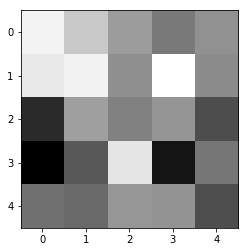

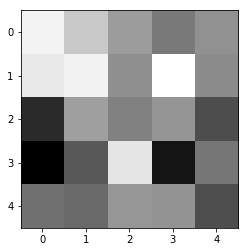

In [70]:
# Get the weights in the first conv layer, "conv1"
# if necessary, change this to reflect the name of your first conv layer
weights1 = net.conv1.weight.data

w = weights1.numpy()

filter_index = 27
kernel = (w[filter_index][0]) 
print(w[filter_index][0])
print(w[filter_index][0].shape)
print(w.shape)

# display the filter weights
plt.imshow(w[filter_index][0], cmap='gray')
plt.show()
plt.imshow(kernel, cmap='gray')
plt.show()

## Feature maps

Each CNN has at least one convolutional layer that is composed of stacked filters (also known as convolutional kernels). As a CNN trains, it learns what weights to include in it's convolutional kernels and when these kernels are applied to some input image, they produce a set of **feature maps**. So, feature maps are just sets of filtered images; they are the images produced by applying a convolutional kernel to an input image. These maps show us the features that the different layers of the neural network learn to extract. For example, you might imagine a convolutional kernel that detects the vertical edges of a face or another one that detects the corners of eyes. You can see what kind of features each of these kernels detects by applying them to an image. One such example is shown below; from the way it brings out the lines in an the image, you might characterize this as an edge detection filter.

<img src='images/feature_map_ex.png' width=50% height=50%/>


Next, choose a test image and filter it with one of the convolutional kernels in your trained CNN; look at the filtered output to get an idea what that particular kernel detects.

### TODO: Filter an image to see the effect of a convolutional kernel
---

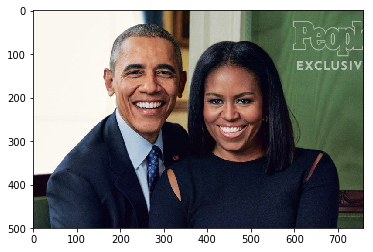

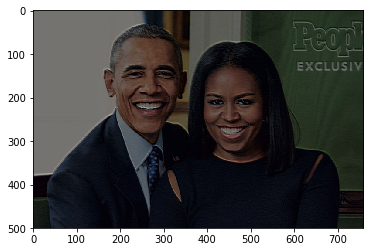

In [71]:
##TODO: load in and display any image from the transformed test dataset
import cv2

image  = cv2.imread('./images/obamas.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()
## TODO: Using cv's filter2D function,

## apply a specific set of filter weights (like the one displayed above) to the test image
filter_image = cv2.filter2D(image, -1, kernel)

plt.imshow(filter_image)
plt.show()



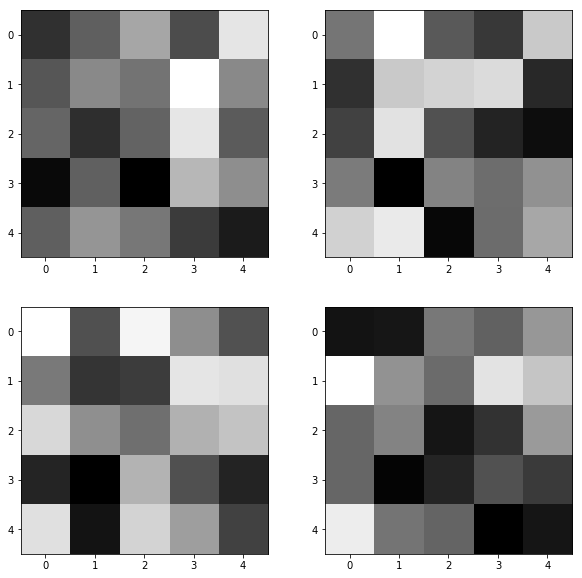

In [56]:
# Get the weights in the first conv layer, "conv1"
# if necessary, change this to reflect the name of your first conv layer

# display the filter weights
weights1 = net.conv1.weight.data

w = weights1.numpy()

# for 20 filters
fig=plt.figure(figsize=(10, 10))
columns = 2
rows = 2
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(w[i][0], cmap='gray')
    
plt.show()

### Question 4: Choose one filter from your trained CNN and apply it to a test image; what purpose do you think it plays? What kind of feature do you think it detects?


**Answer**: this filter reduces the brightness of all pixels and also applies a blur to the entire image.

---
## Moving on!

Now that you've defined and trained your model (and saved the best model), you are ready to move on to the last notebook, which combines a face detector with your saved model to create a facial keypoint detection system that can predict the keypoints on *any* face in an image!